In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
traindata=train_data.copy()
testdata=test_data.copy()

In [3]:
traindata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
na_percentage = traindata.isna().mean()
cols_to_drop = na_percentage[na_percentage > 0.14].index
cols_to_drop

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [5]:
traindata=traindata.drop(columns=cols_to_drop)

In [6]:
testdata=testdata.drop(columns=cols_to_drop)

In [7]:
# Assuming df is your DataFrame
# Drop rows with more than 4 missing values
testdata = testdata.dropna(thresh=testdata.shape[1] - 3)

In [8]:
testdata.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1332.000000,1346.000000,1346.000000,...,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000,1346.000000
mean,2185.454681,56.329866,9834.139673,6.209510,5.573551,1973.322437,1984.631501,107.852102,463.887816,56.730312,...,500.591382,98.433135,49.387816,22.936107,1.814264,17.426449,1.473997,58.361813,6.117385,2007.770431
std,420.139120,41.557230,4797.128591,1.379865,1.058588,29.642204,20.738579,182.516712,456.729095,183.182070,...,191.912688,129.808697,66.810188,66.884445,20.489830,56.922038,27.838563,652.207811,2.723361,1.300290
min,1461.000000,20.000000,1484.000000,2.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1819.500000,20.000000,7443.250000,5.000000,5.000000,1955.000000,1966.000000,0.000000,0.000000,0.000000,...,356.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2185.500000,50.000000,9528.500000,6.000000,5.000000,1976.000000,1993.000000,0.000000,385.500000,0.000000,...,484.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2544.750000,70.000000,11604.250000,7.000000,6.000000,2002.000000,2004.000000,176.000000,769.750000,0.000000,...,587.500000,171.750000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,570.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
# Identify columns with missing values
columns_with_missing = traindata.columns[traindata.isnull().any()]

# Display characteristics of columns with missing values
for column in columns_with_missing:
    print("Column:", column)
    print("Total missing values:", traindata[column].isnull().sum())
    print("Percentage of missing values:", traindata[column].isnull().mean() * 100)
    print("Data type:", traindata[column].dtype)
    print("Unique values:", traindata[column].unique())
    print("\n")

Column: MasVnrArea
Total missing values: 8
Percentage of missing values: 0.547945205479452
Data type: float64
Unique values: [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.

In [10]:
traindata = traindata.dropna(thresh=traindata.shape[1] - 4)

In [11]:
# Identify columns with missing values
columns_with_missing = traindata.columns[traindata.isnull().any()]

# Display characteristics of columns with missing values
for column in columns_with_missing:
    print("Column:", column)
    print("Total missing values:", traindata[column].isnull().sum())
    print("Percentage of missing values:", traindata[column].isnull().mean() * 100)
    print("Data type:", traindata[column].dtype)
    print("Unique values:", traindata[column].unique())
    print("\n")

Column: MasVnrArea
Total missing values: 8
Percentage of missing values: 0.5930318754633062
Data type: float64
Unique values: [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 4.360e+02 2.520e+02 8.400e+01 6.640e+02
 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02 7.480e+02
 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02 2.600e+02 1.530e+02
 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02 2.900e+02 1.270e+02
 5.060e+02 2.970e+02  

In [12]:
# Calculate the median of the "MasVnrArea" column
median_mas_vnr_area = traindata['MasVnrArea'].median()

# Replace missing values in the "MasVnrArea" column with the median
traindata['MasVnrArea'] = traindata['MasVnrArea'].fillna(median_mas_vnr_area)

In [13]:
# Identify columns with missing values
columns_with_missing = traindata.columns[traindata.isnull().any()]

# Display characteristics of columns with missing values
for column in columns_with_missing:
    print("Column:", column)
    print("Total missing values:", traindata[column].isnull().sum())
    print("Percentage of missing values:", traindata[column].isnull().mean() * 100)
    print("Data type:", traindata[column].dtype)
    print("Unique values:", traindata[column].unique())
    print("\n")

Column: BsmtExposure
Total missing values: 1
Percentage of missing values: 0.07412898443291327
Data type: object
Unique values: ['No' 'Gd' 'Mn' 'Av' nan]


Column: BsmtFinType2
Total missing values: 1
Percentage of missing values: 0.07412898443291327
Data type: object
Unique values: ['Unf' 'BLQ' 'ALQ' 'Rec' 'LwQ' 'GLQ' nan]


Column: Electrical
Total missing values: 1
Percentage of missing values: 0.07412898443291327
Data type: object
Unique values: ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]




In [14]:
# Assuming df is your DataFrame
# Identify columns with missing values of type 'object'
object_columns_with_missing = traindata.select_dtypes(include=['object']).columns[traindata.select_dtypes(include=['object']).isnull().any()]

# Fill missing values with mode for object columns
for column in object_columns_with_missing:
    mode_value = traindata[column].mode()[0]  # Calculate the mode
    traindata[column] = traindata[column].fillna(mode_value)  # Fill missing values with mode

# Now missing values in 'object' columns are filled with the most frequent value

In [15]:
traindata.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
traindata=traindata.drop(columns='Id')

In [17]:
traindata.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
categorical=traindata.select_dtypes('object')
numerical=[x for x in traindata.columns if x not in categorical]#all other columns are numerical

<Axes: >

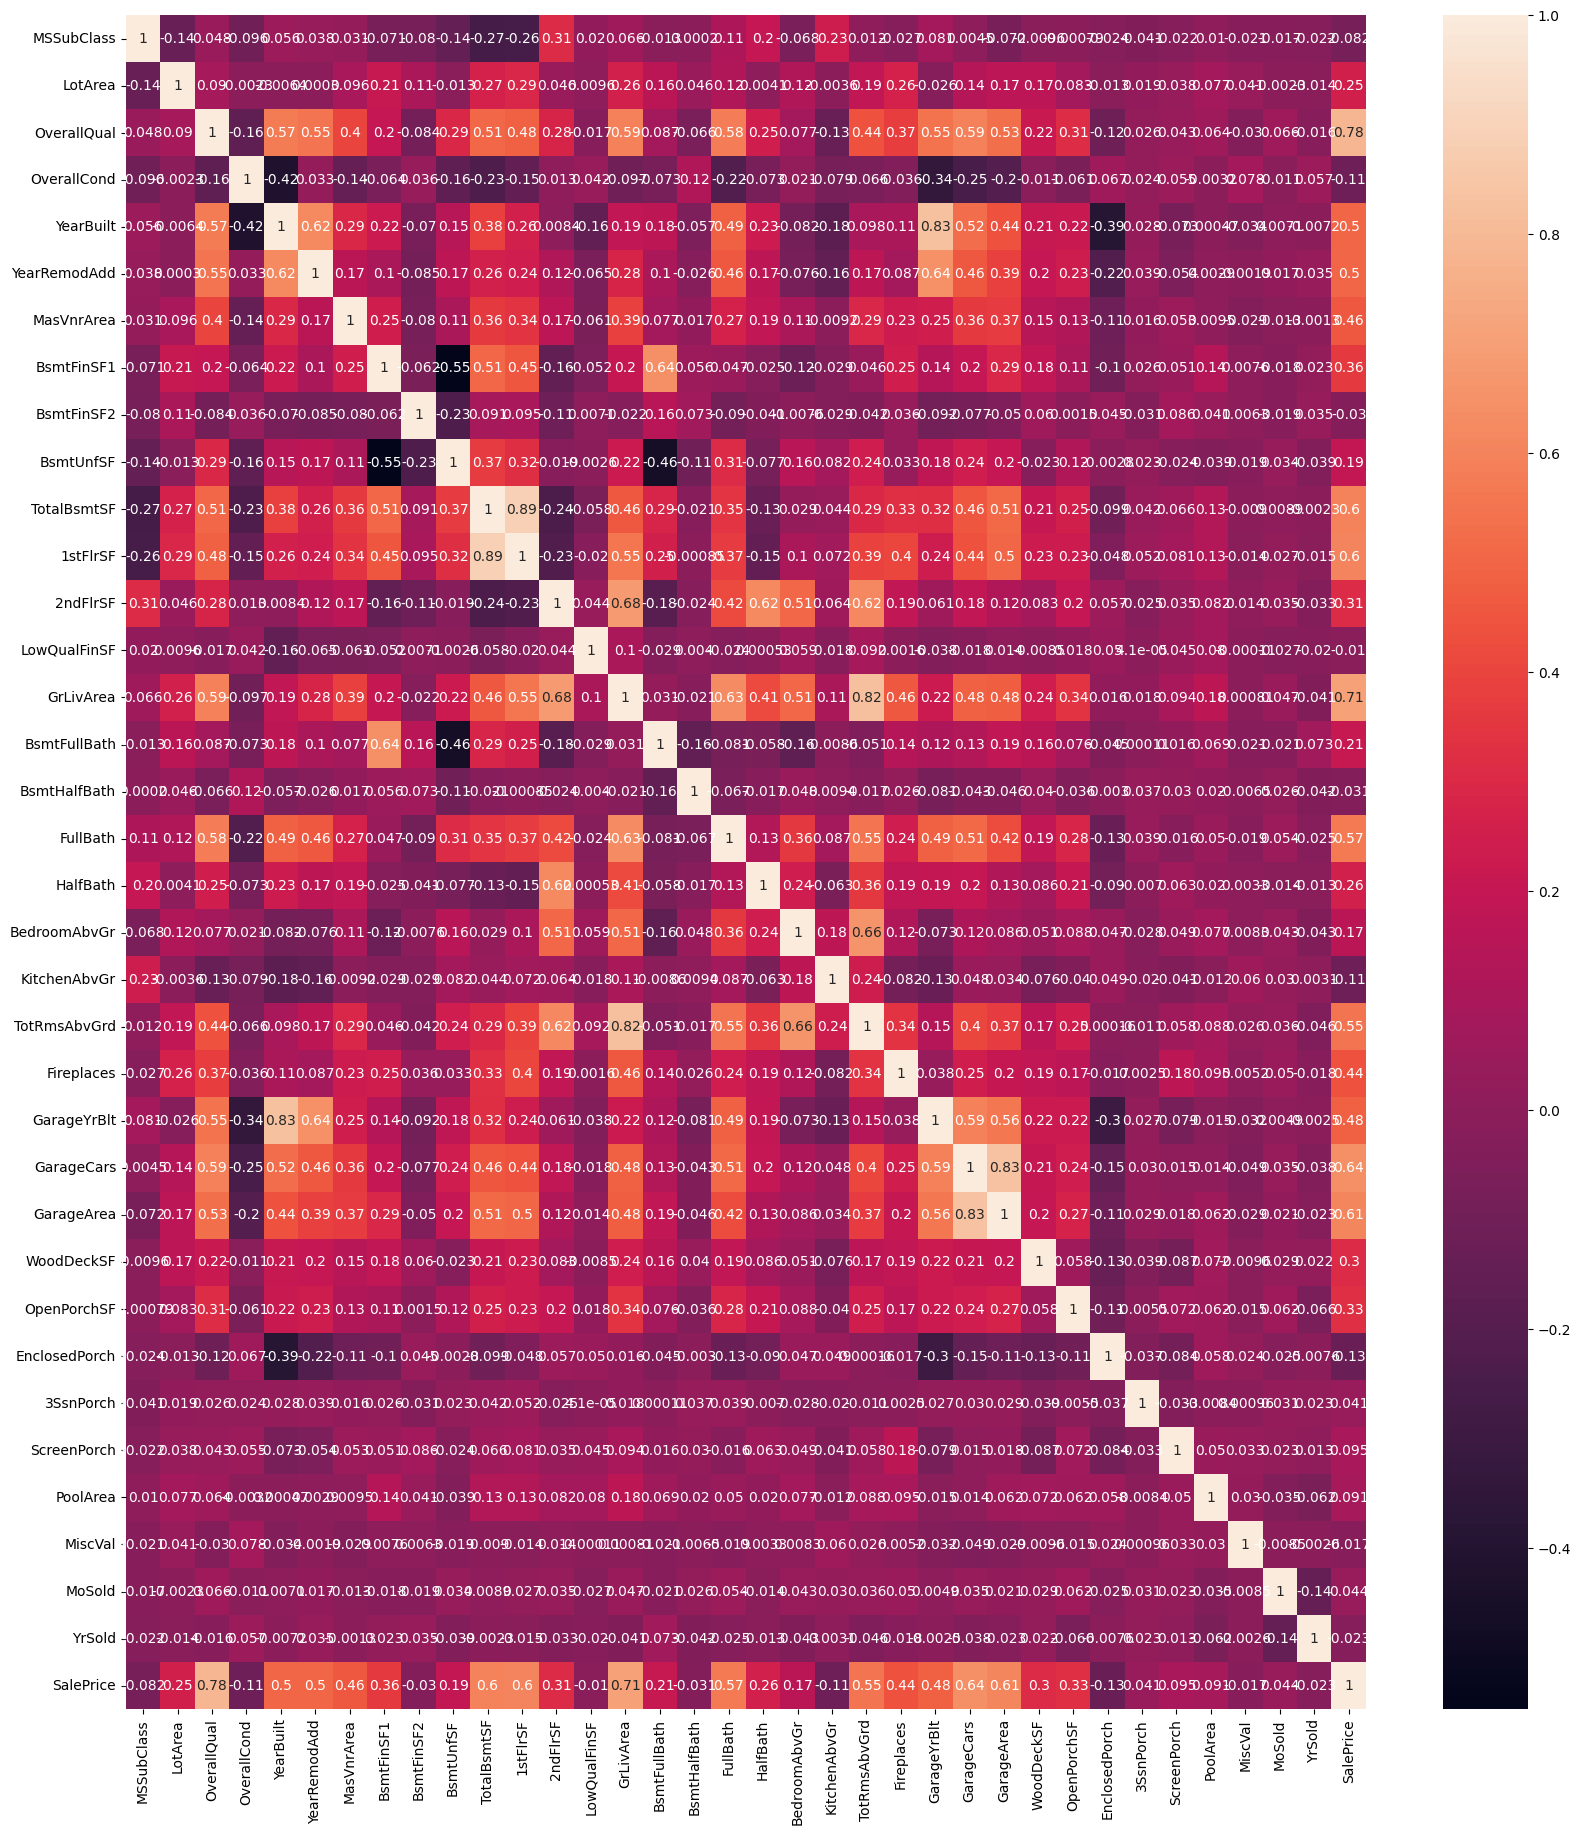

In [19]:
plt.figure(figsize=(20,22))
sns.heatmap(traindata[numerical].corr(),annot=True)

In [20]:
relationShips=traindata[numerical].corr()['SalePrice'].sort_values(ascending=False)[1:]
relationShips

OverallQual      0.784687
GrLivArea        0.709752
GarageCars       0.641556
GarageArea       0.609317
1stFlrSF         0.603725
TotalBsmtSF      0.600592
FullBath         0.566923
TotRmsAbvGrd     0.548752
YearBuilt        0.504003
YearRemodAdd     0.501054
GarageYrBlt      0.481712
MasVnrArea       0.461374
Fireplaces       0.443540
BsmtFinSF1       0.362921
OpenPorchSF      0.326525
2ndFlrSF         0.306557
WoodDeckSF       0.304944
HalfBath         0.258983
LotArea          0.253724
BsmtFullBath     0.212578
BsmtUnfSF        0.192072
BedroomAbvGr     0.165211
ScreenPorch      0.094793
PoolArea         0.091057
MoSold           0.043781
3SsnPorch        0.041393
LowQualFinSF    -0.010404
MiscVal         -0.017277
YrSold          -0.022720
BsmtFinSF2      -0.029673
BsmtHalfBath    -0.031131
MSSubClass      -0.081938
KitchenAbvGr    -0.109576
OverallCond     -0.110242
EnclosedPorch   -0.127379
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

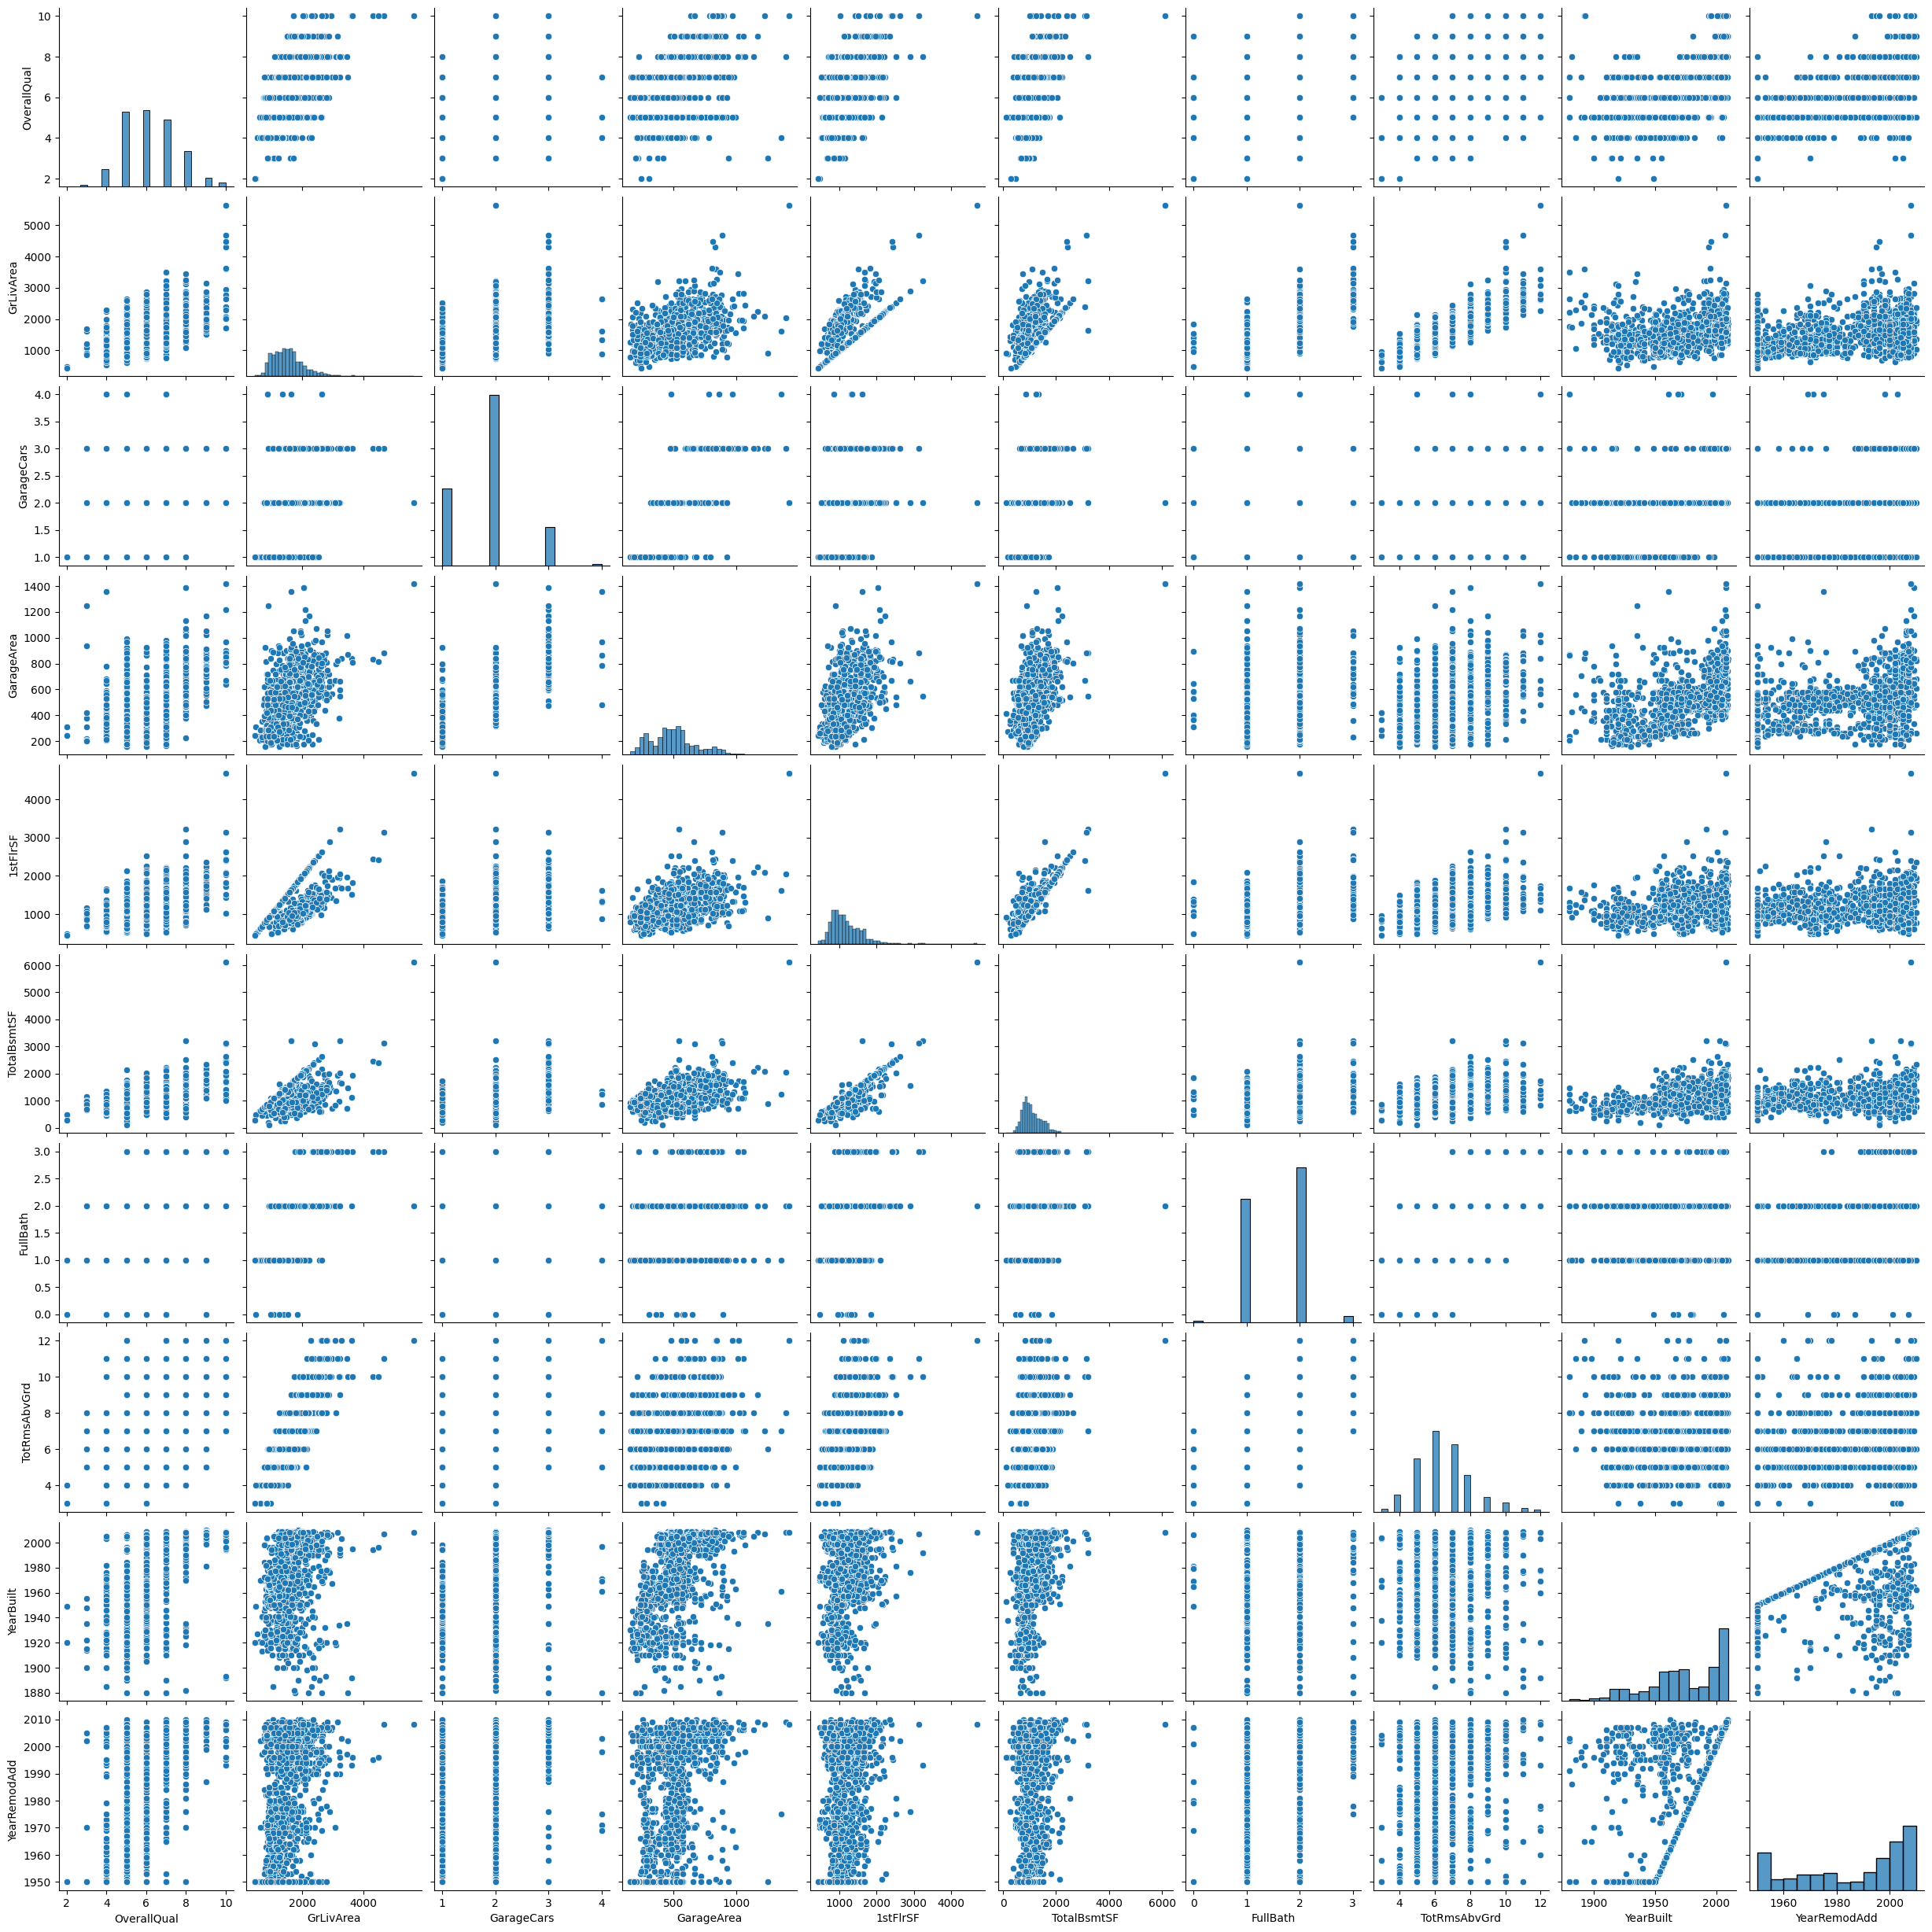

In [21]:
sns.pairplot(traindata[relationShips.index.values[:10]])

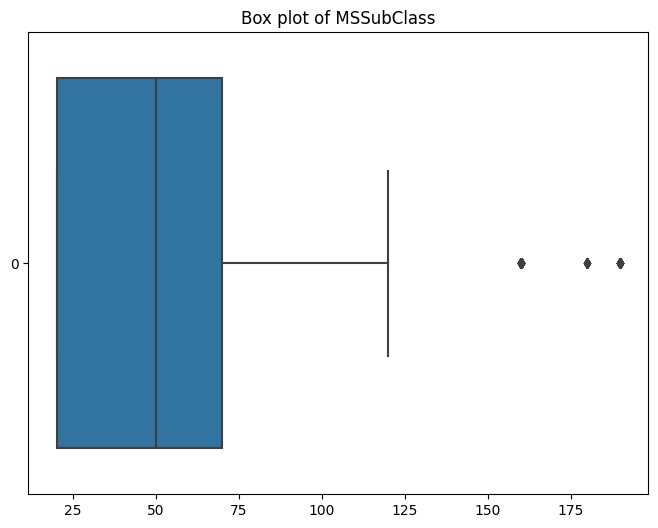

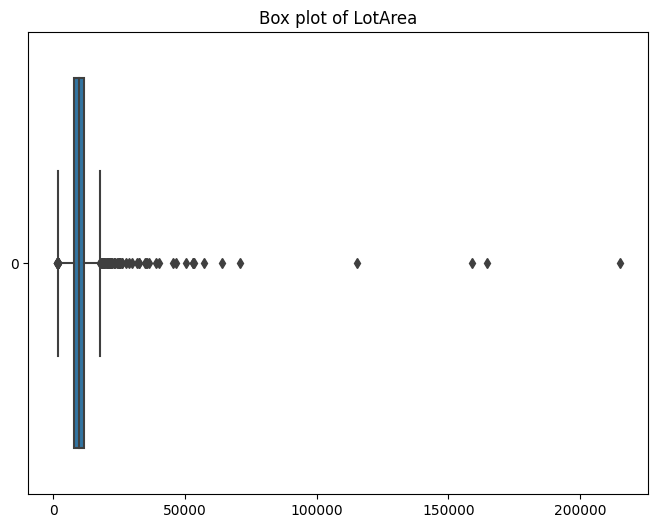

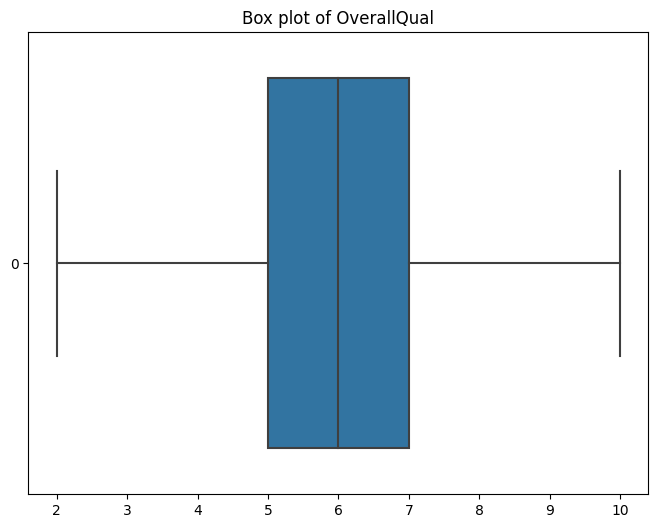

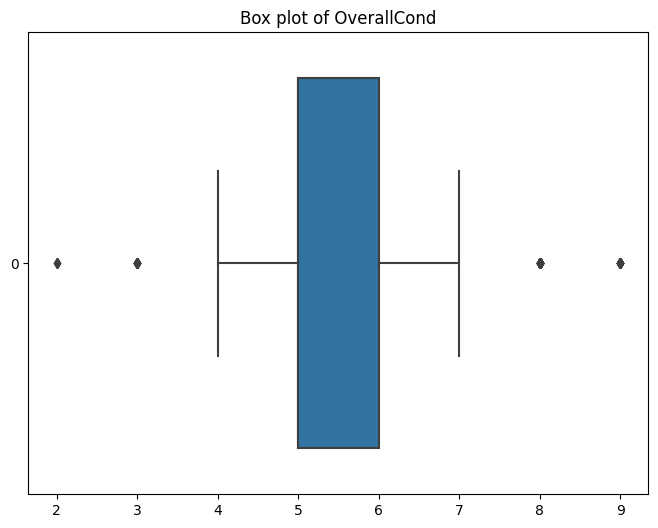

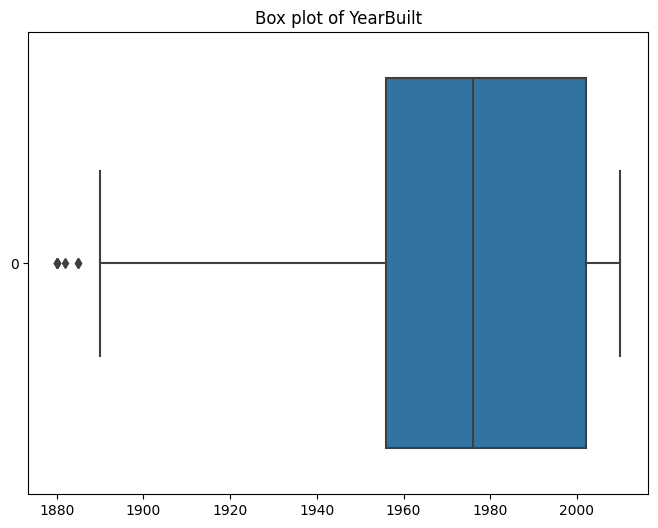

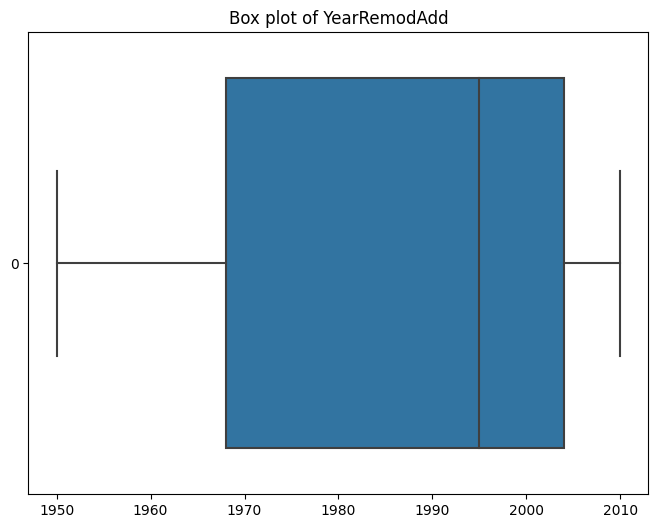

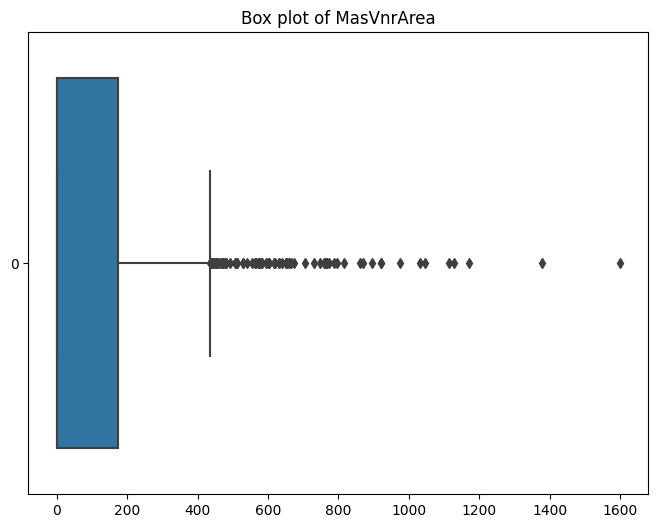

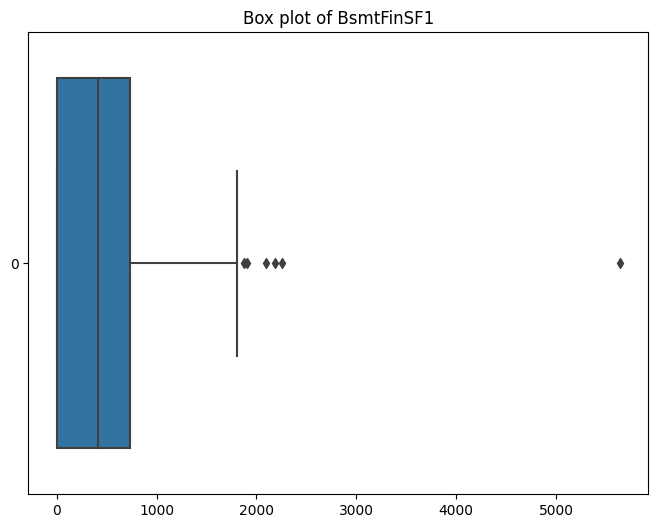

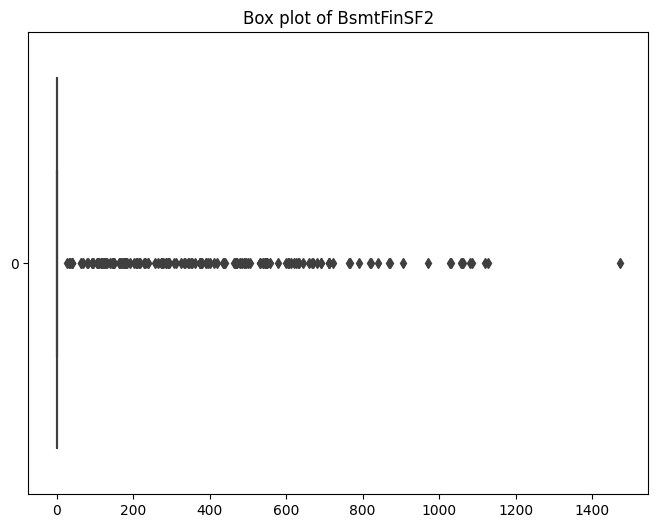

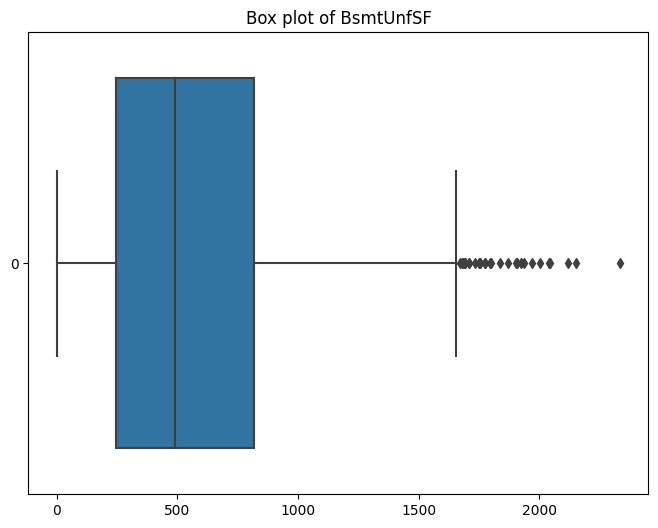

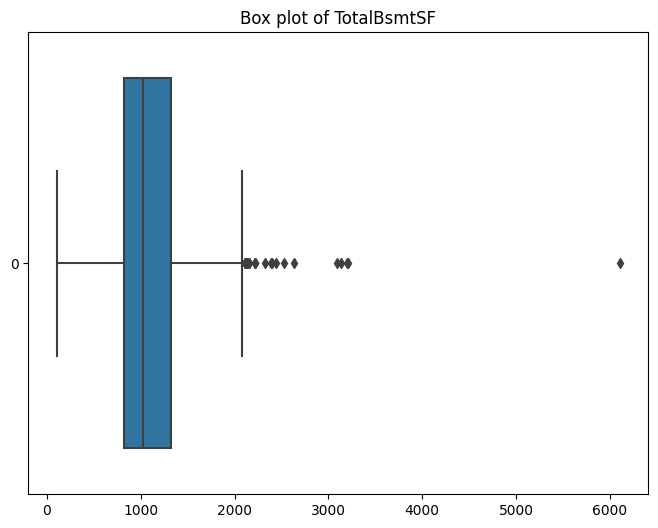

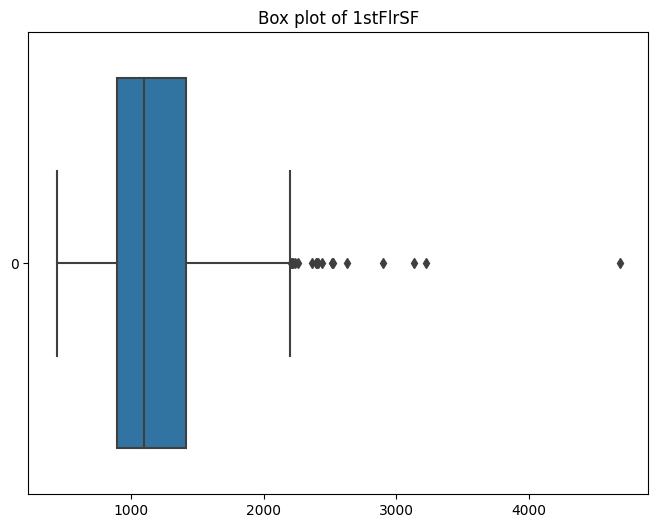

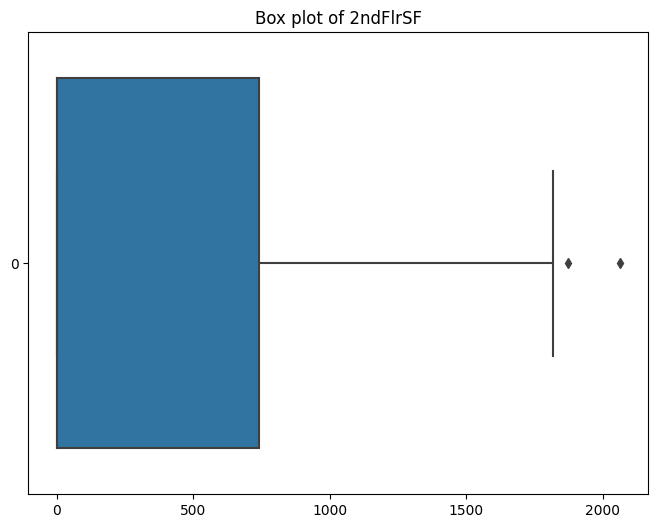

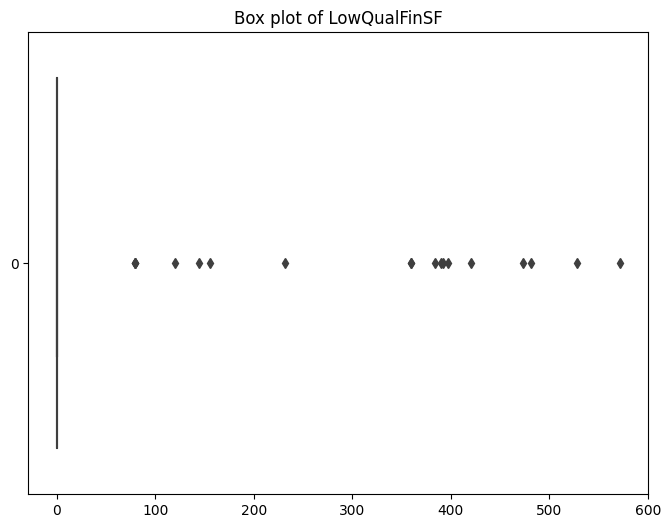

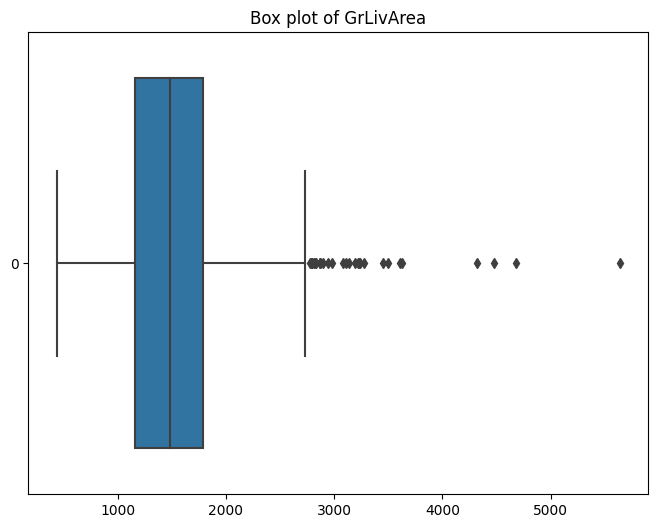

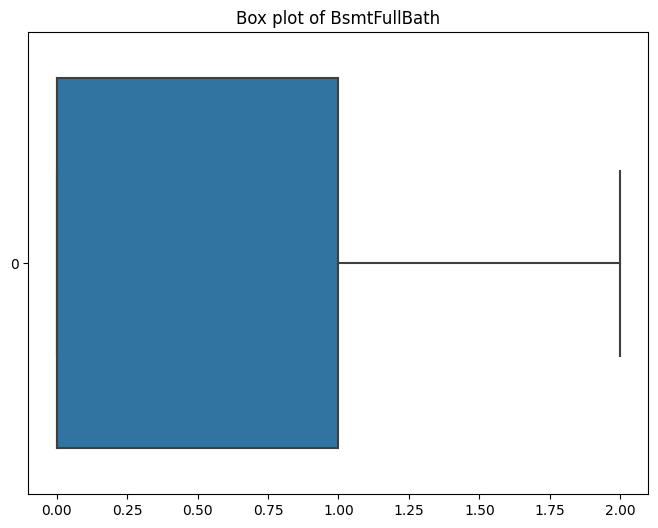

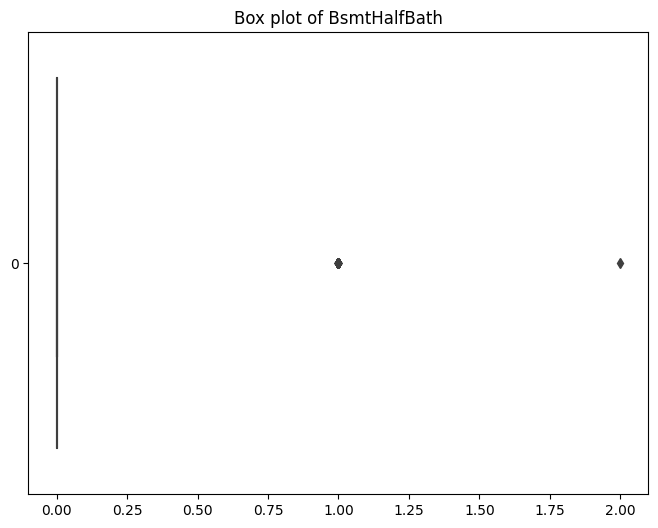

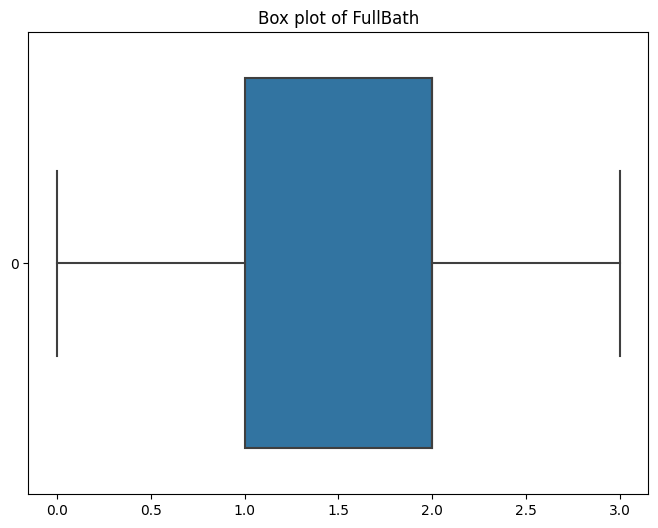

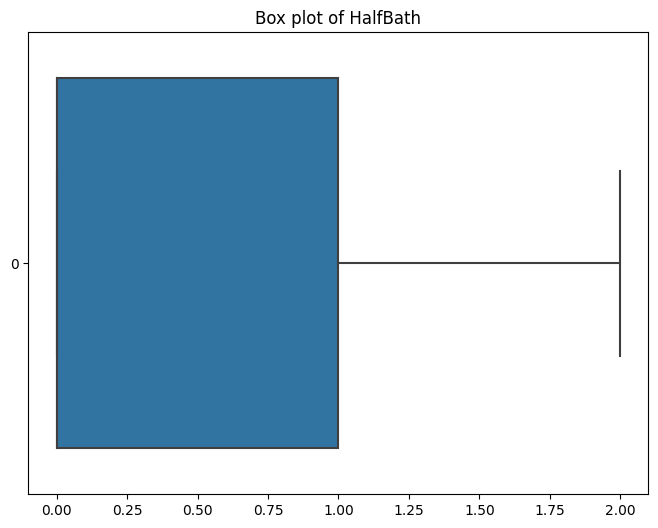

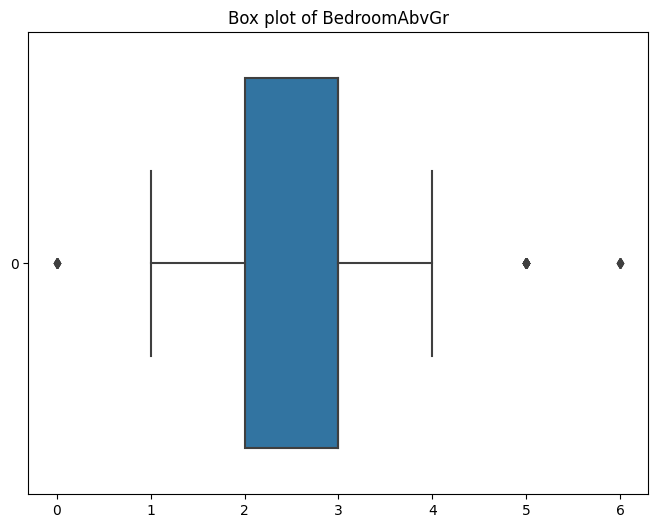

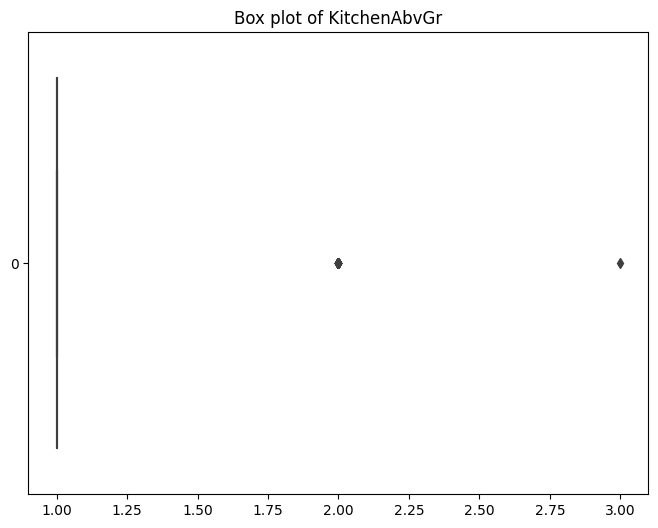

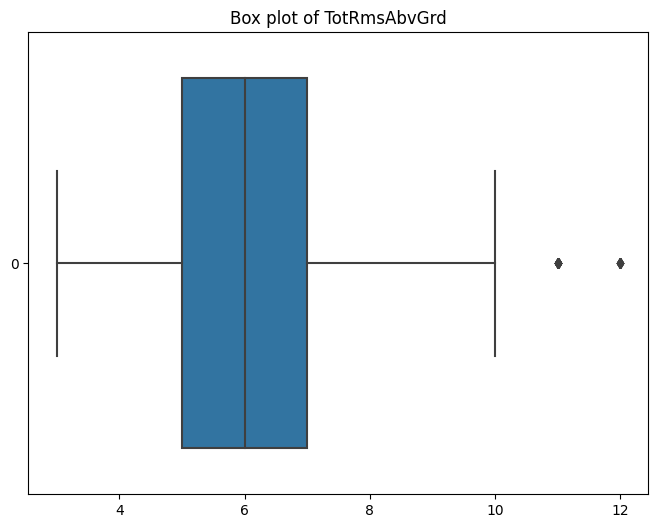

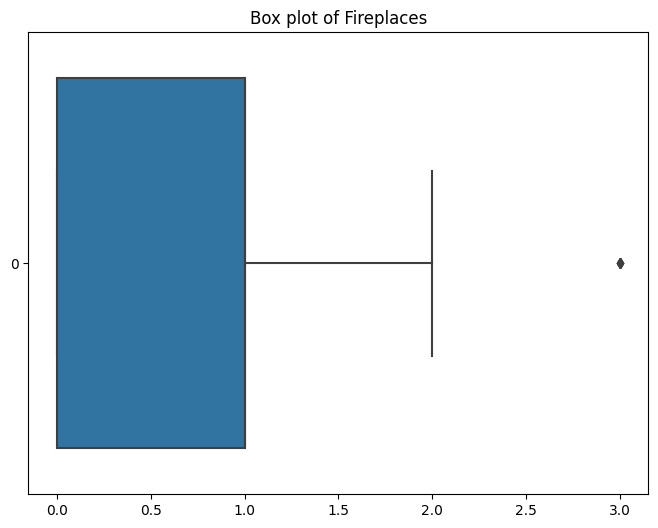

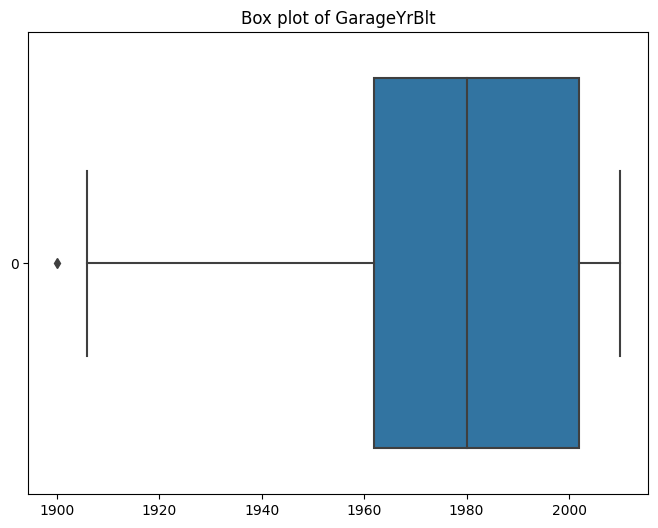

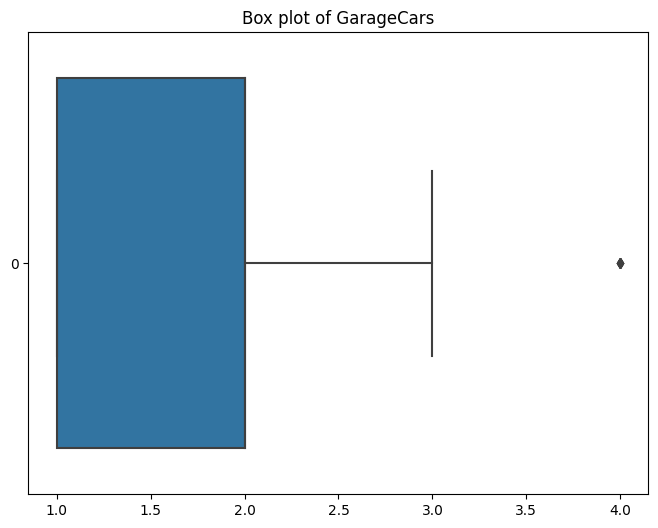

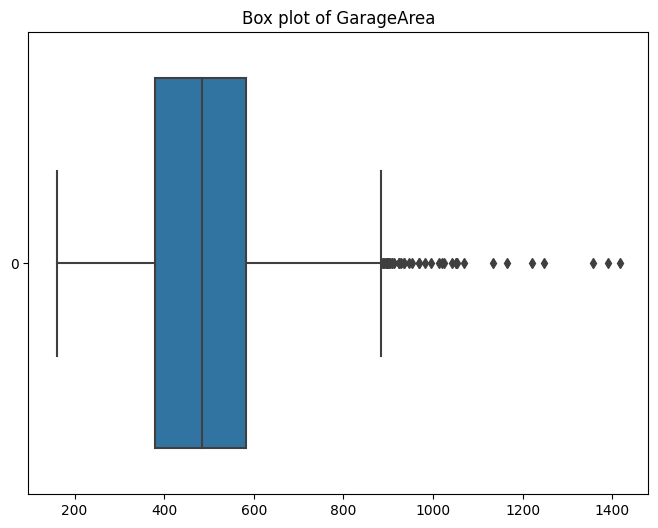

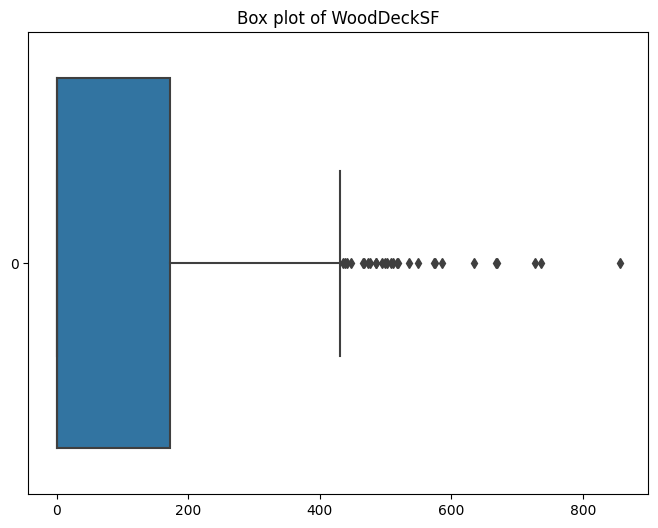

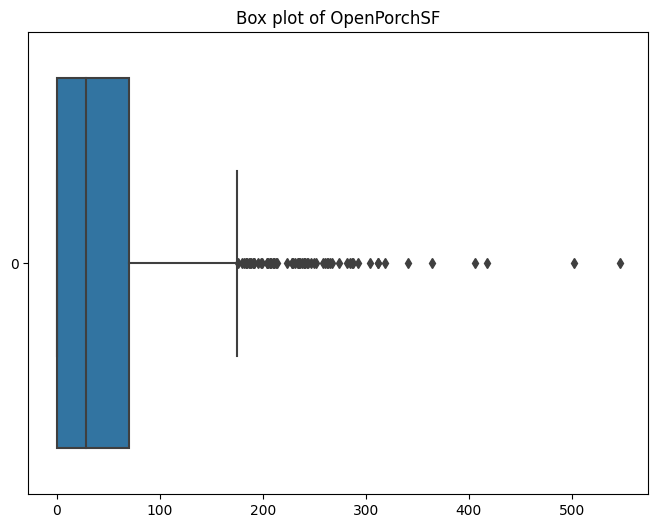

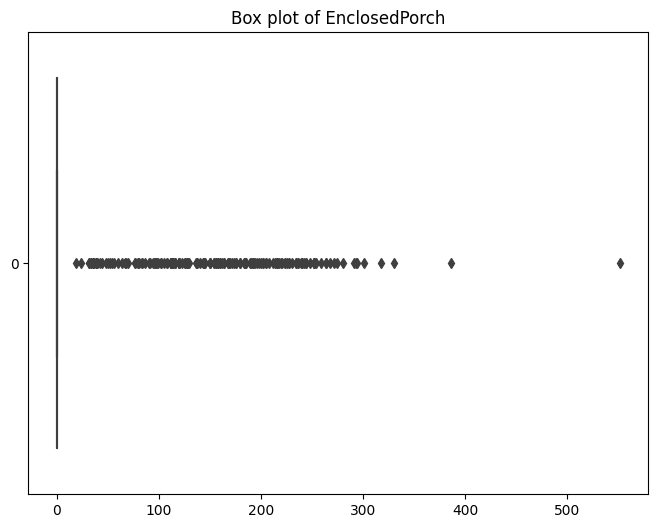

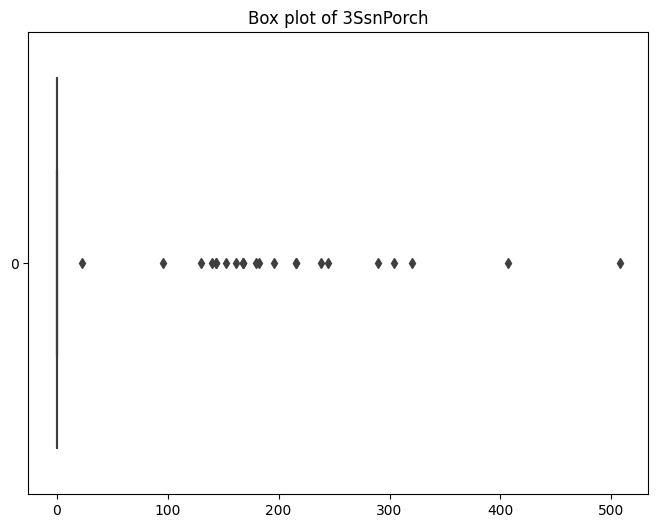

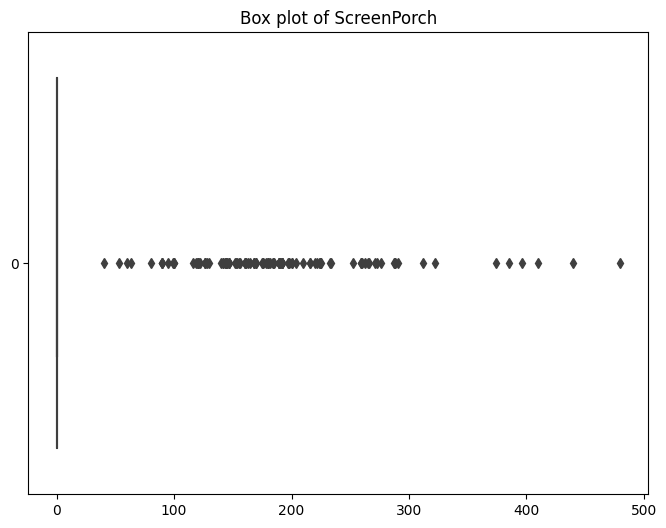

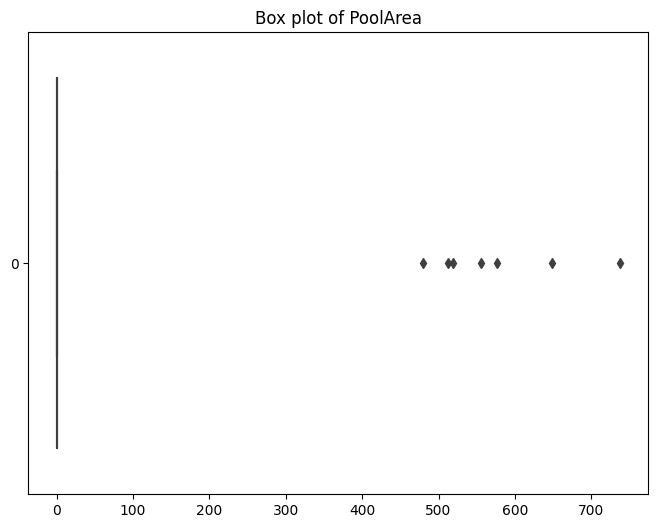

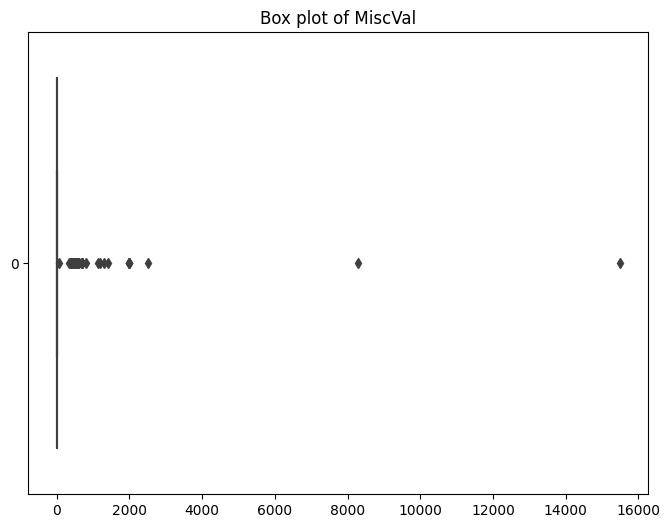

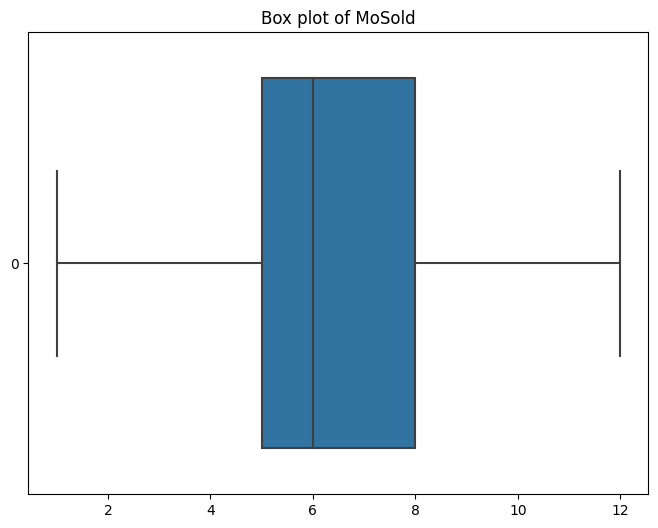

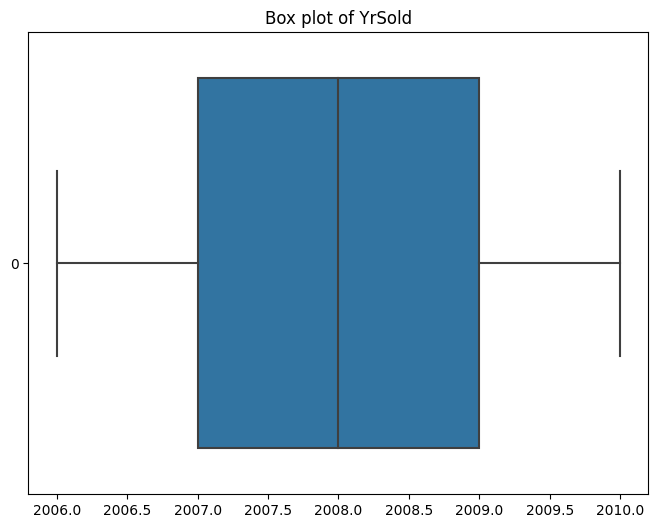

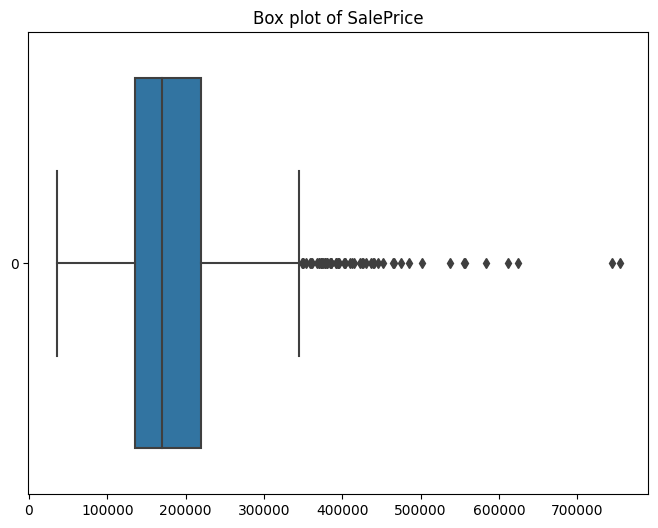

In [22]:
# Assuming df is your DataFrame and numerical_columns is your list of numerical column names
for column in numerical:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=traindata[column], orient='h')
    plt.title(f'Box plot of {column}')
    plt.show()

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

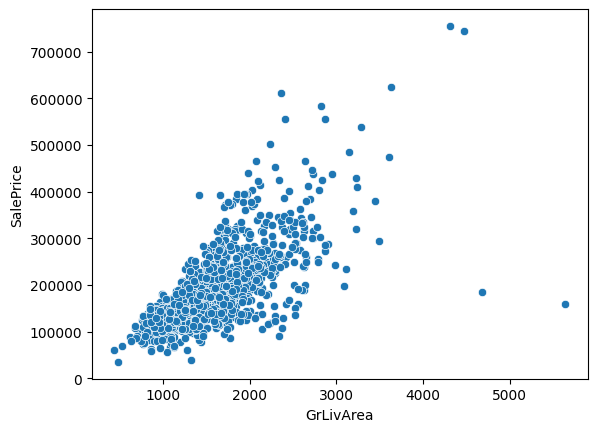

In [23]:
sns.scatterplot(y=traindata['SalePrice'],x=traindata['GrLivArea'])

In [24]:
def remove_outliers(series, threshold=3):
    """
    Remove outliers from a pandas Series based on the specified threshold.
    
    Parameters:
    series (pandas Series): The numerical series from which outliers will be removed.
    threshold (float): The threshold for identifying outliers based on the number of standard deviations from the mean. Default is 3.
    
    Returns:
    pandas Series: The series with outliers removed.
    """
    mean = np.mean(series)
    std = np.std(series)
    z_scores = (series - mean) / std
    return series[abs(z_scores) < threshold]

# Assuming df is your DataFrame with numerical columns
# Apply remove_outliers function to numerical columns using lambda function
traindata[numerical] = traindata[numerical].apply(lambda x: remove_outliers(x))

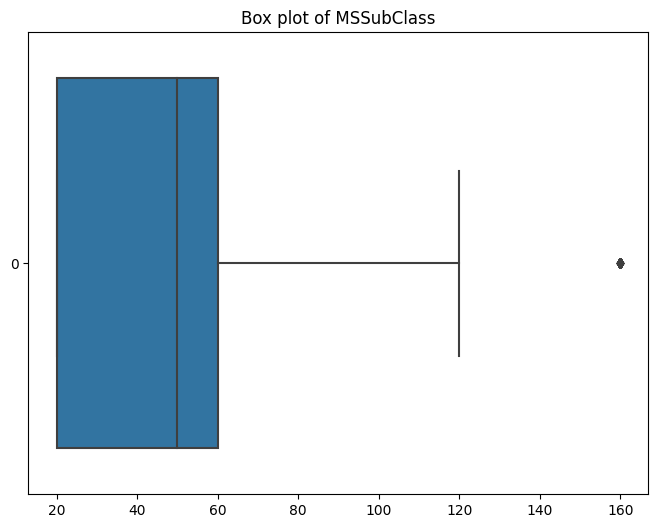

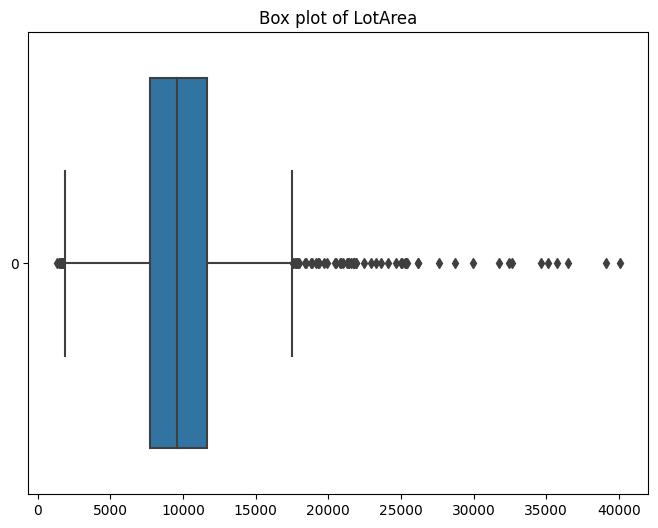

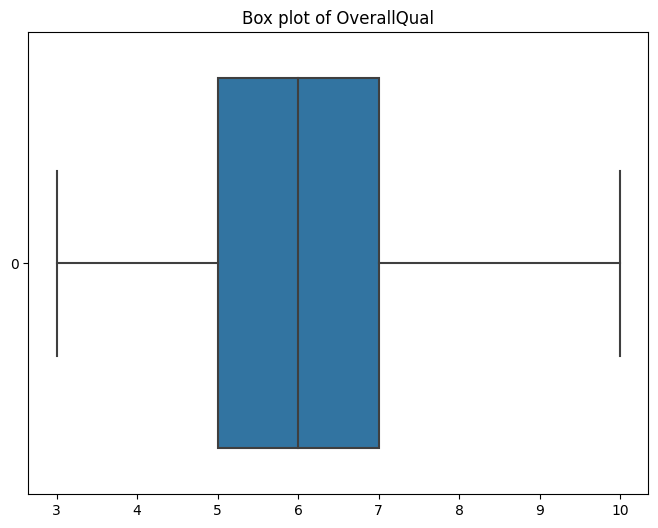

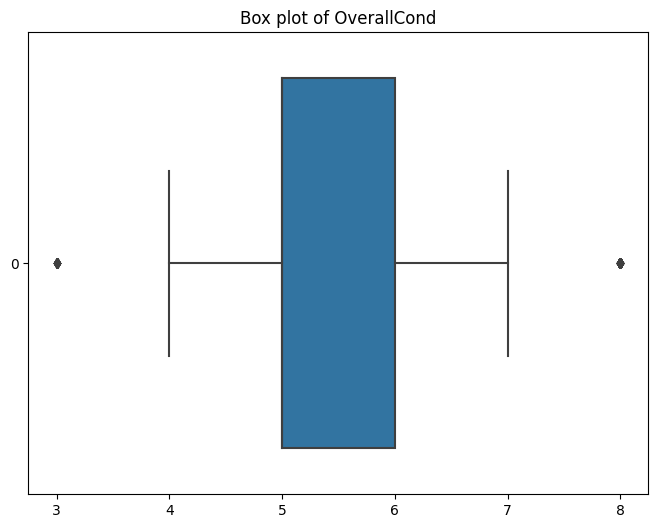

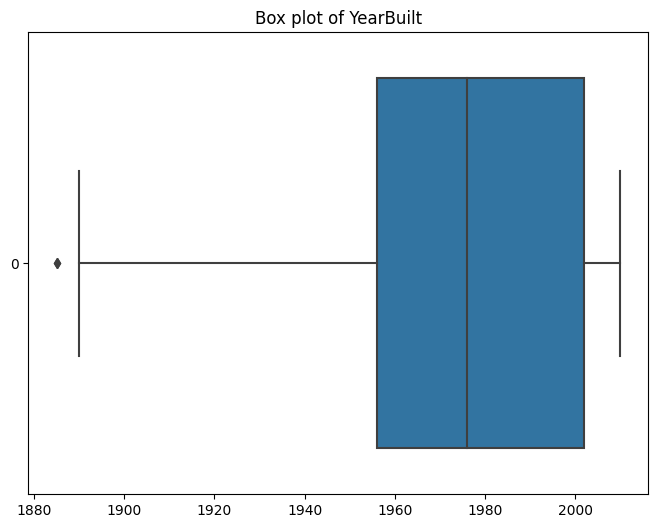

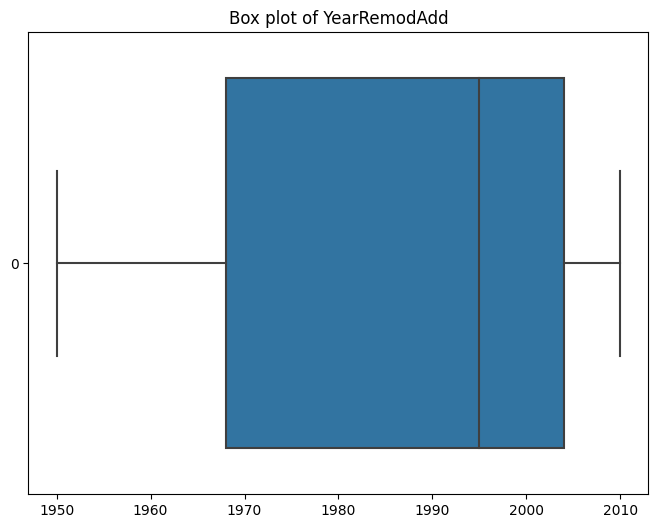

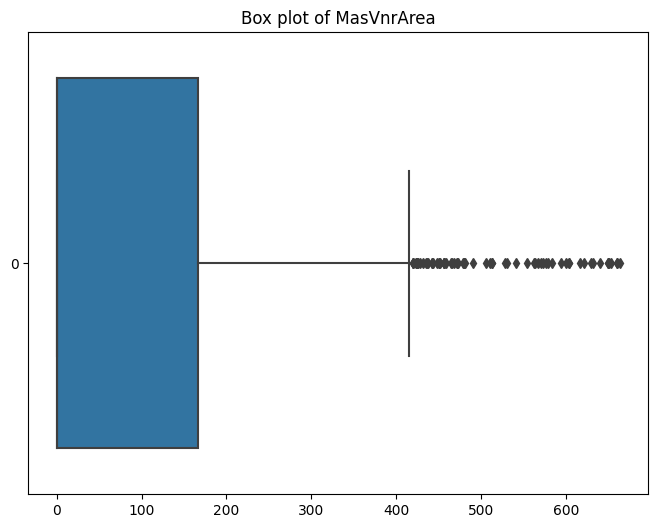

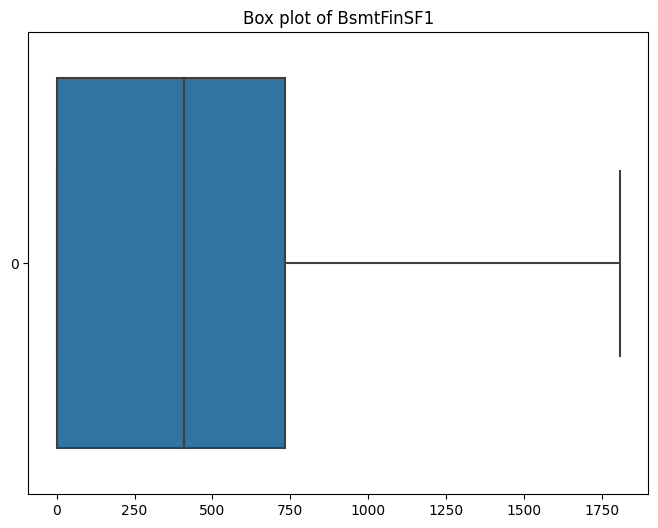

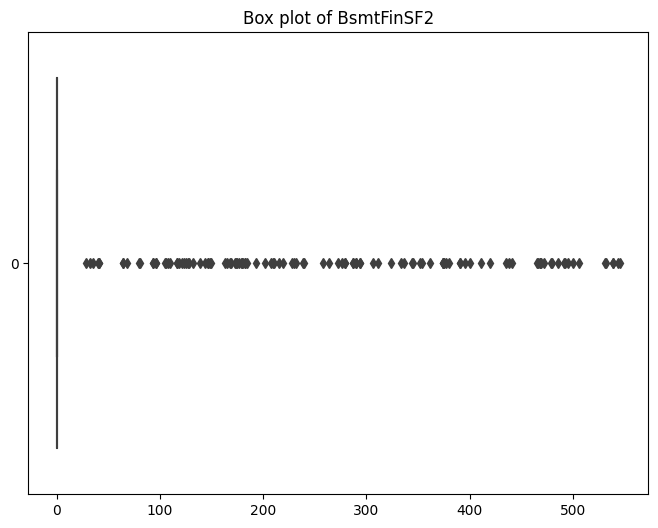

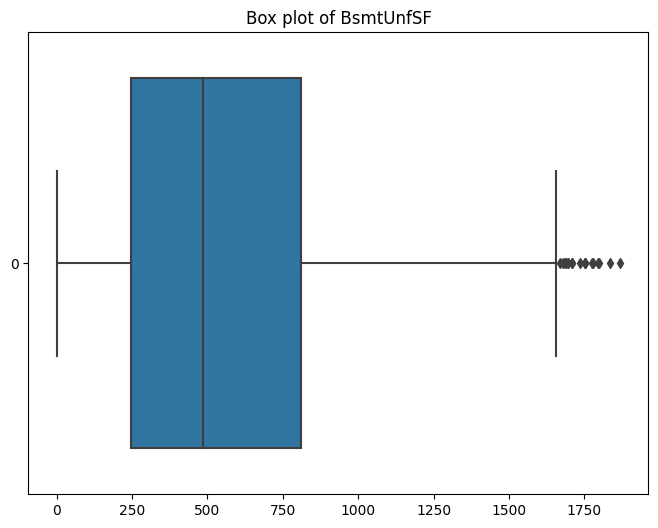

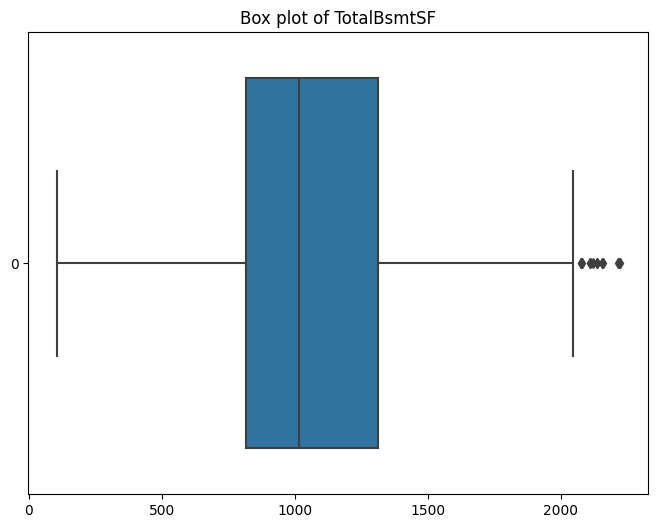

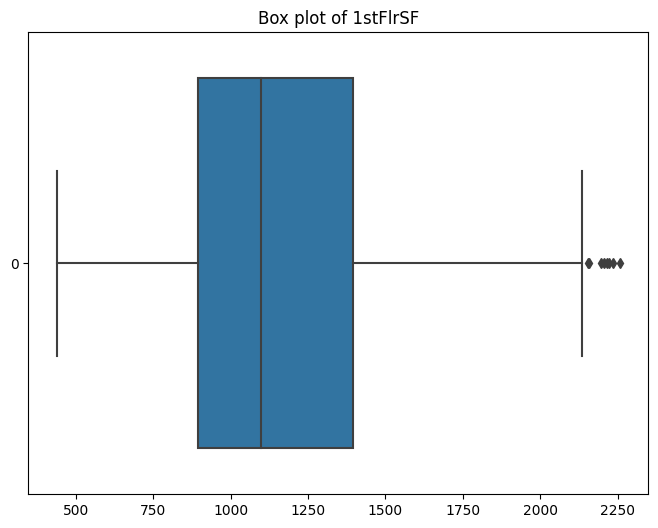

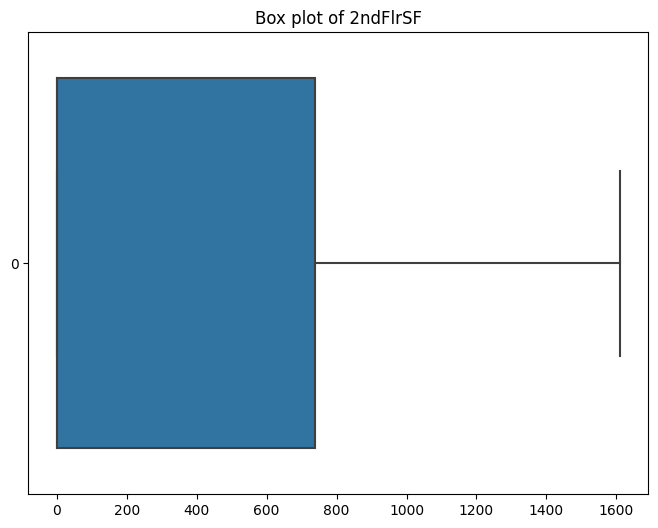

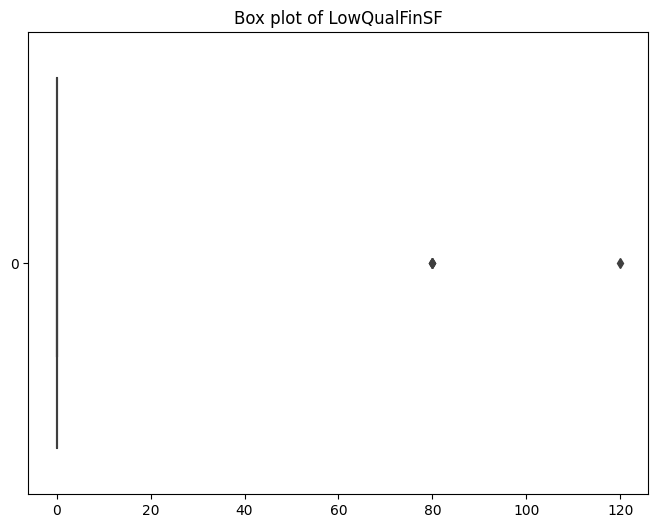

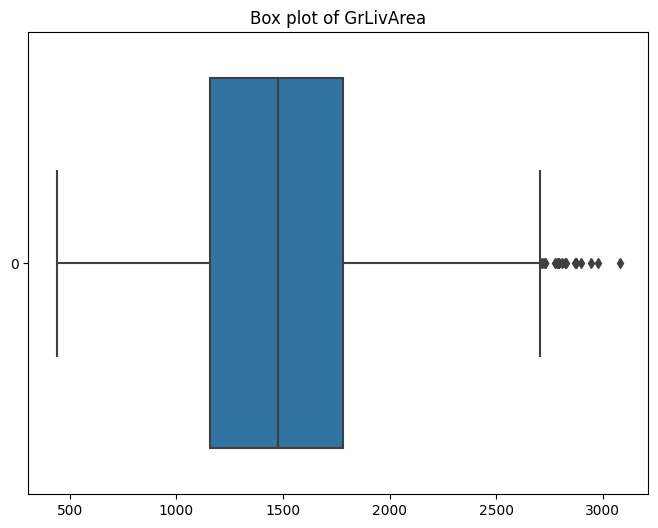

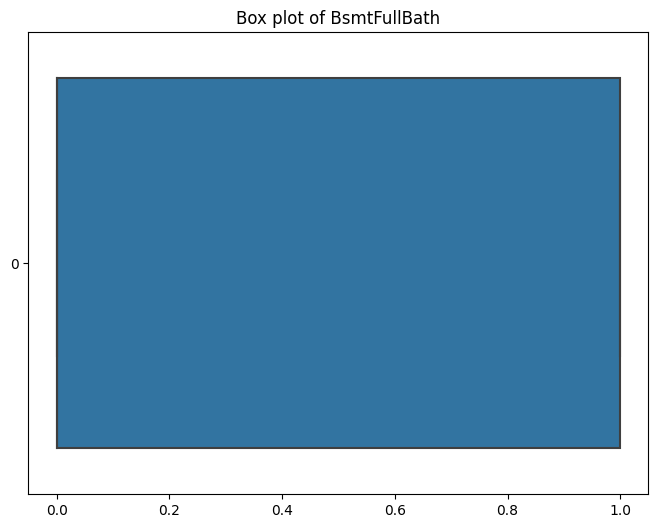

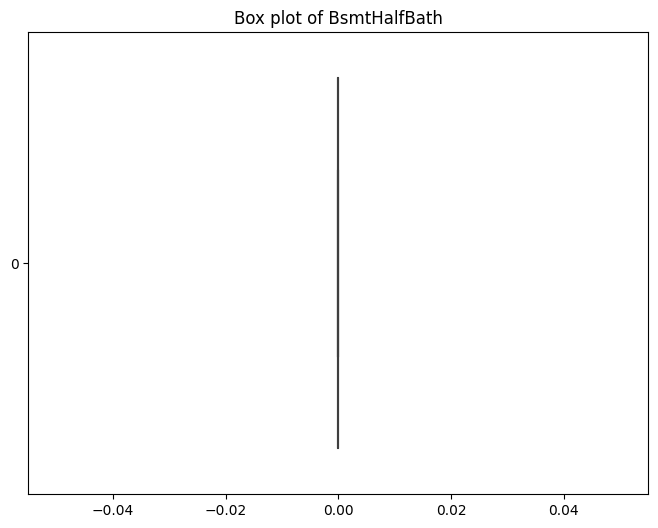

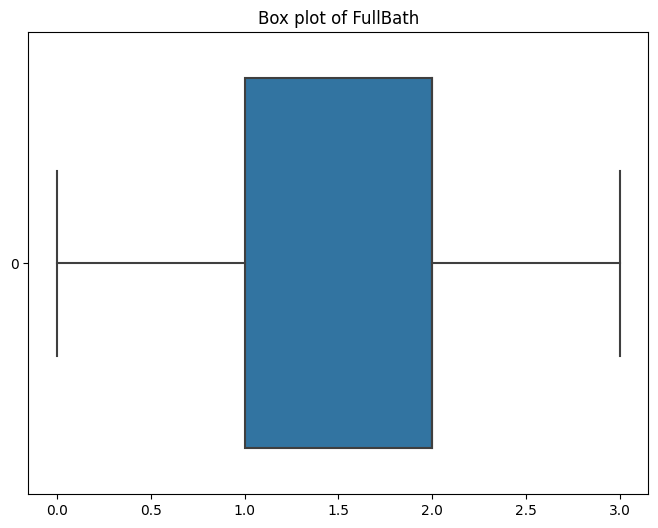

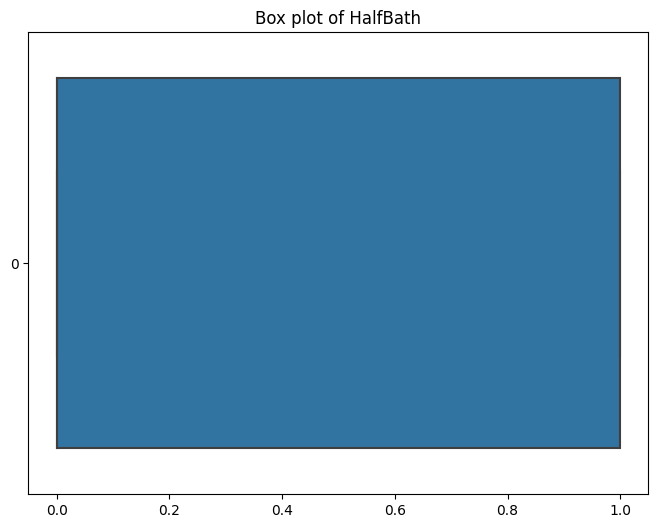

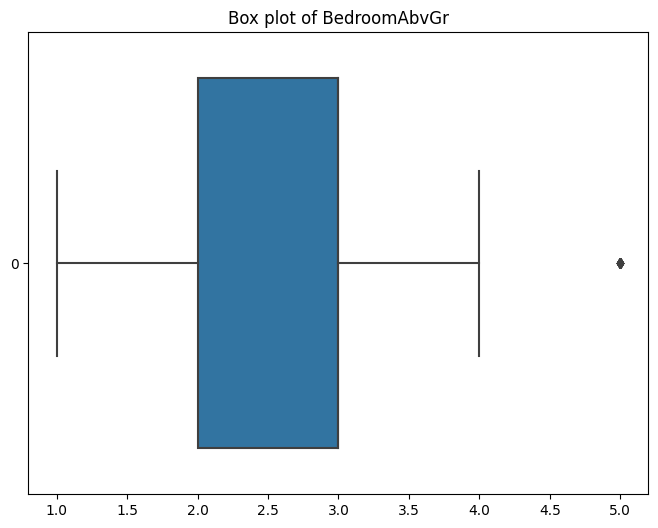

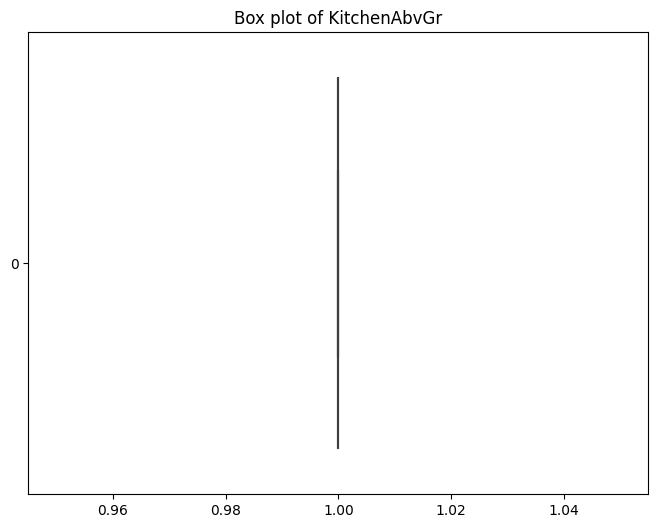

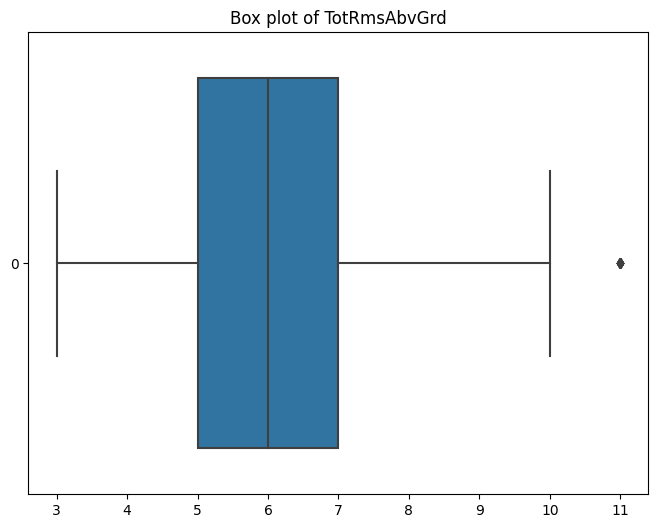

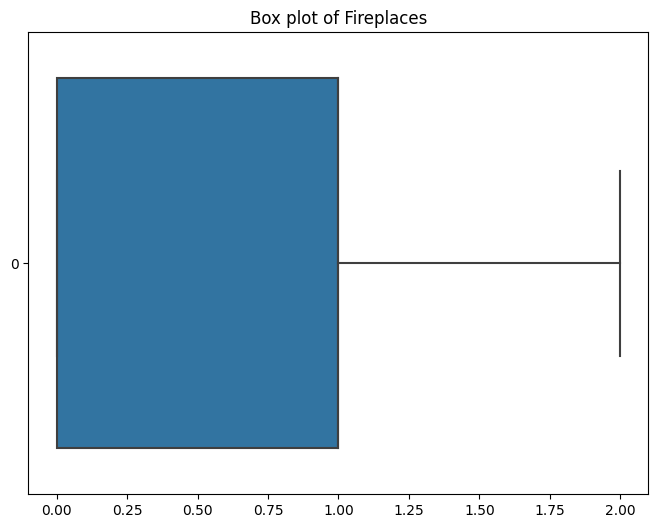

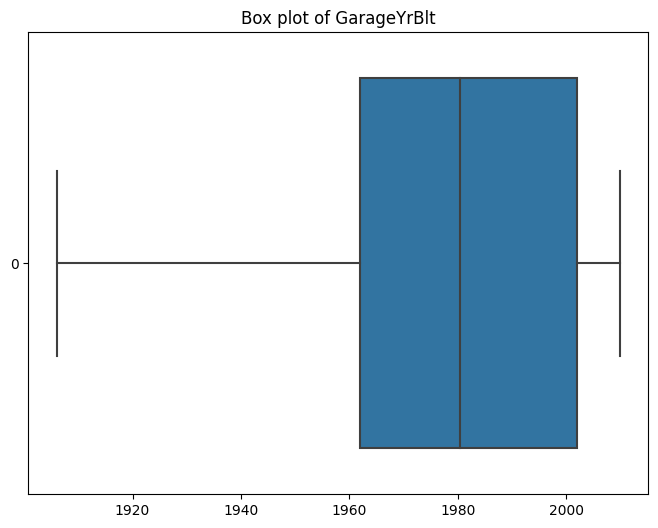

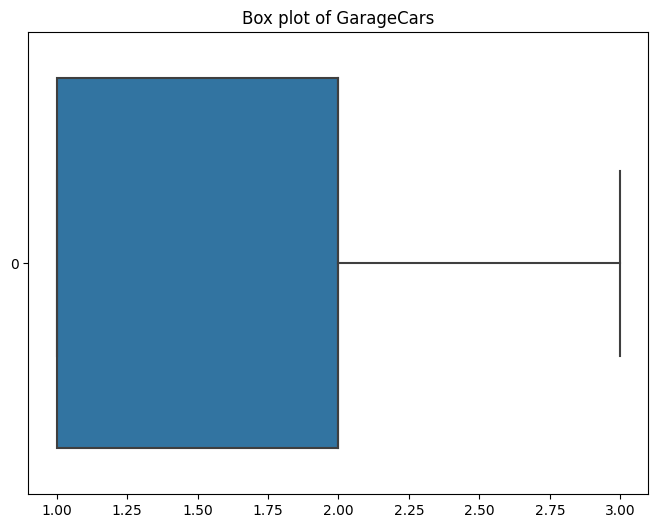

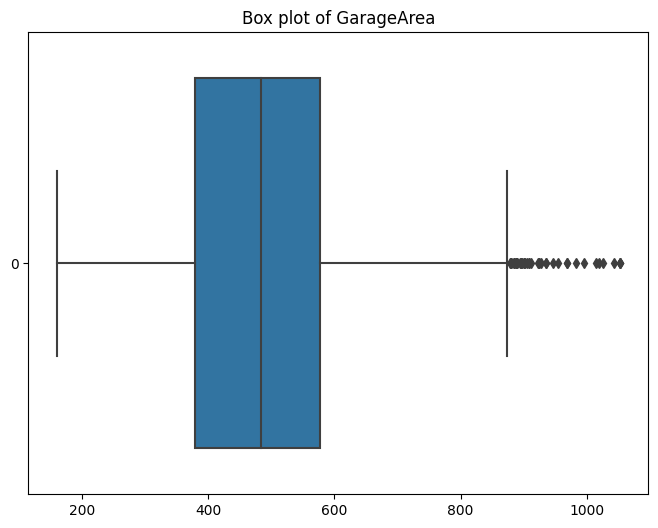

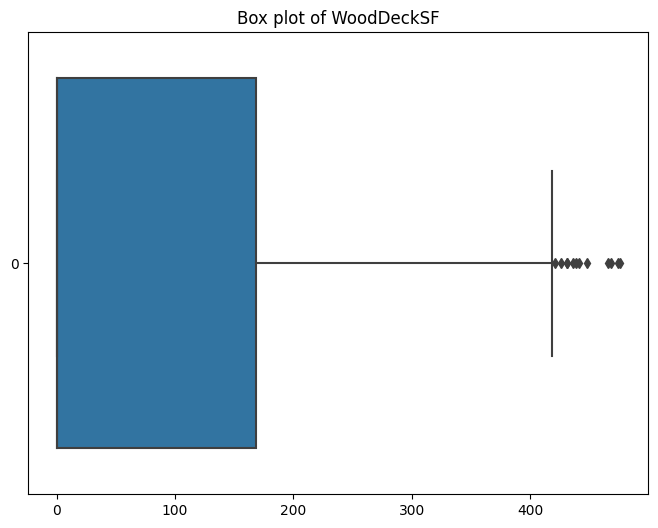

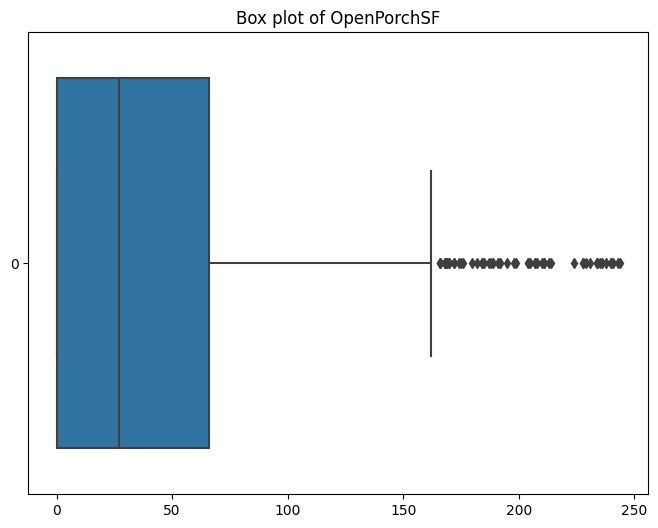

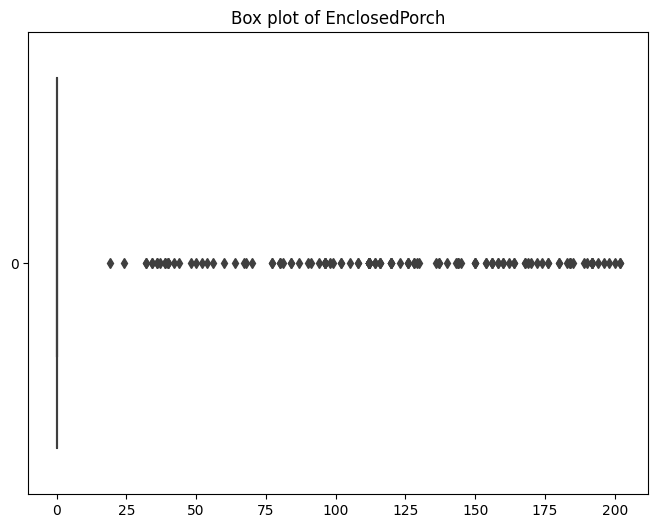

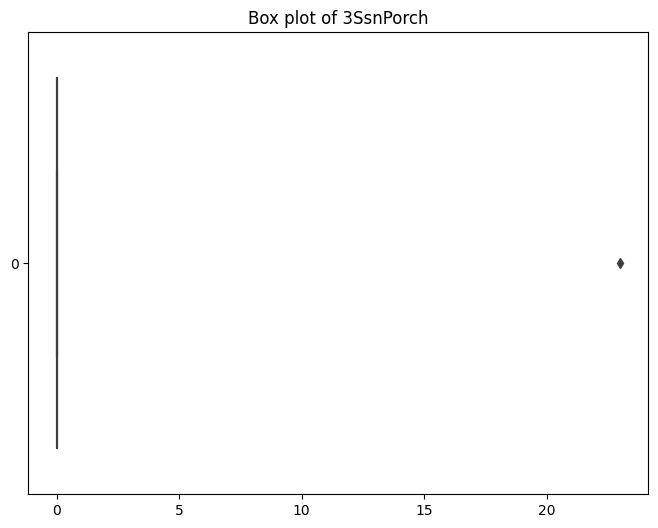

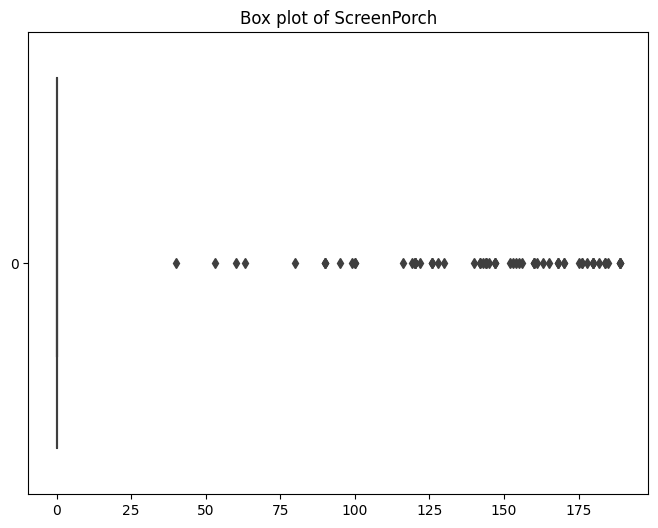

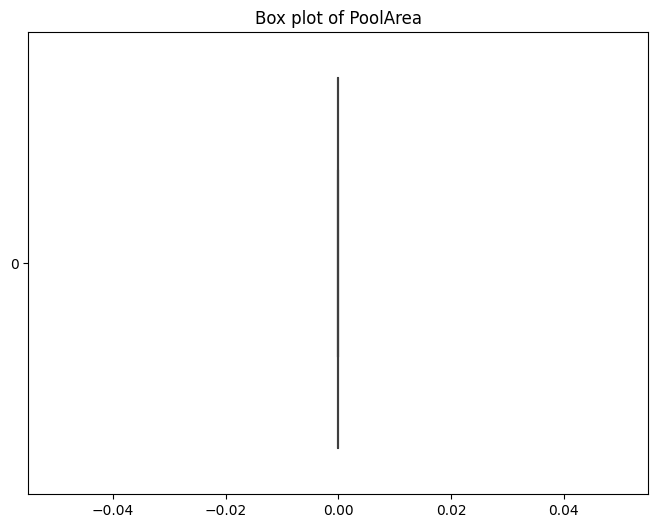

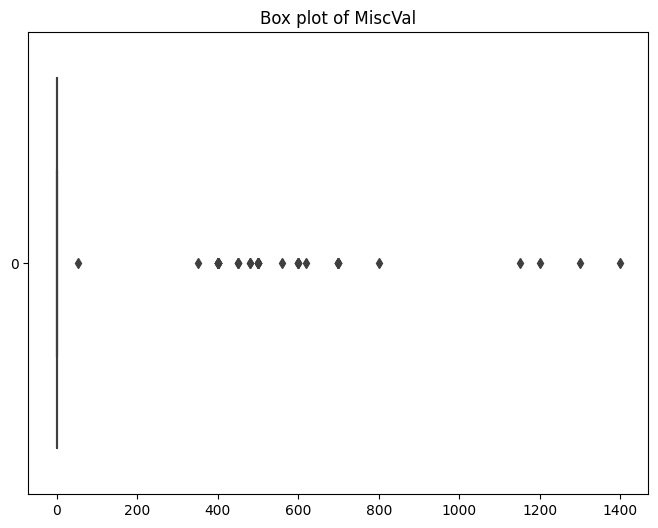

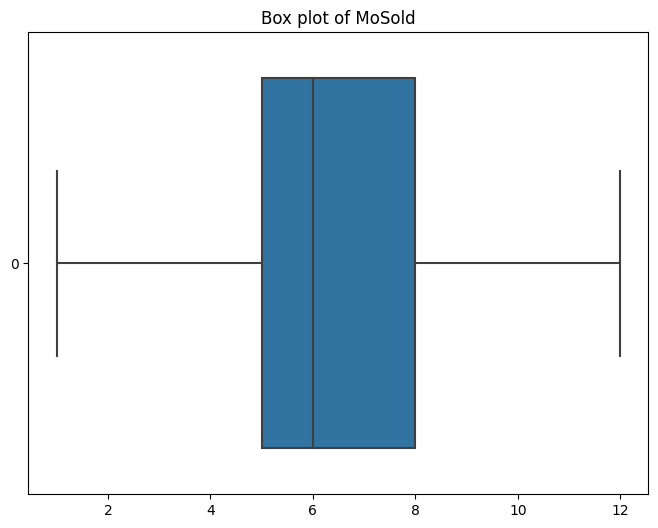

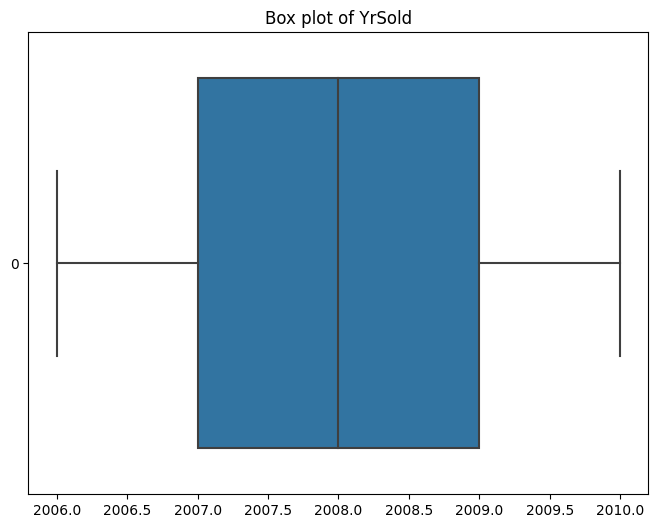

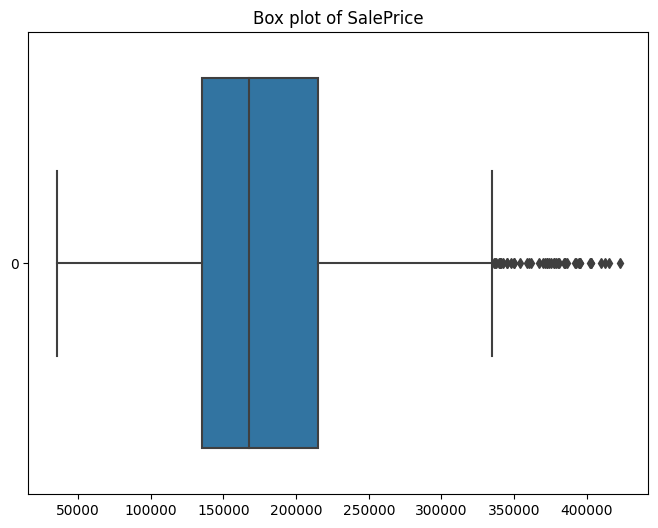

In [25]:
for column in numerical:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=traindata[column], orient='h')
    plt.title(f'Box plot of {column}')
    plt.show()

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

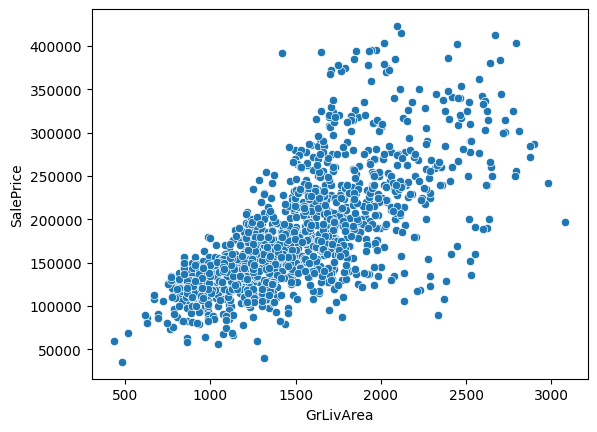

In [26]:
sns.scatterplot(y=traindata['SalePrice'],x=traindata['GrLivArea'])

In [27]:
# Assuming df is your DataFrame containing categorical variables
# Identify categorical columns
categorical_columns = traindata.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(traindata, columns=categorical_columns)

# Replace 1s with 1 and all other values with 0
# df_encoded = df_encoded.applymap(lambda x: 1 if x == 1 else 0)
# Replace 1s with 1 and all other values with 0
for col in df_encoded.columns:
    df_encoded[col] = df_encoded[col].map(lambda x: 1 if x == 1 else 0)
# Now encoded_df contains one-hot encoded columns with values as 1 and 0

In [28]:
df_encoded.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [29]:
df_encoded.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1349.0,1349.0,1349.0,1349.0,1349.0,1349.0,1349.000000,1349.0,1349.0,1349.0,...,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.001483,0.0,0.0,0.0,...,0.002965,0.088955,0.000741,0.864344,0.063751,0.000741,0.005930,0.014826,0.823573,0.091179
std,0.0,0.0,0.0,0.0,0.0,0.0,0.038490,0.0,0.0,0.0,...,0.054393,0.284784,0.027227,0.342550,0.244399,0.027227,0.076808,0.120900,0.381324,0.287970
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
relationShips=df_encoded.corr()['SalePrice'].sort_values(ascending=False)[1:]
relationShips

LotArea                 NaN
OverallQual             NaN
OverallCond             NaN
YearBuilt               NaN
YearRemodAdd            NaN
                         ..
SaleCondition_AdjLand   NaN
SaleCondition_Alloca    NaN
SaleCondition_Family    NaN
SaleCondition_Normal    NaN
SaleCondition_Partial   NaN
Name: SalePrice, Length: 260, dtype: float64

# Linear Regression

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
# Assuming df is your DataFrame with features and target variable
X = df_encoded.drop('SalePrice', axis=1)  # Features
y = df_encoded['SalePrice']  # Target variable

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [35]:
model = LinearRegression()

In [36]:
# Hyperparameter Tuning
param_grid = {'fit_intercept': [True, False]}  # Hyperparameters grid

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("best_params", best_params)
print("best_model", best_model)

best_params {'fit_intercept': True}
best_model LinearRegression()


In [37]:
test_predictions = best_model.predict(X_test)

# Evaluate performance (e.g., MSE)
test_mse = mean_squared_error(y_test, test_predictions)

In [39]:
test_predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
test_mse